**Reasons why a loan could be rejected:**
* Credit score was too low
* Debt-to-income ratio was too high
* Tried to borrow too much
* Income was insufficient or unstable
* Didn’t meet the basic requirements
* Missing information on the application
* Loan purpose didn’t meet the lender’s criteria

[Reference](https://www.lendingtree.com/personal/reasons-why-your-personal-loan-was-declined/)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score 
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.impute import SimpleImputer


import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Bondora_raw.csv')

In [3]:
df.head()

,ReportAsOfEOD,LoanId,LoanNumber,ListedOnUTC,BiddingStartedOn,BidsPortfolioManager,BidsApi,BidsManual,UserName,NewCreditCustomer,...,PreviousEarlyRepaymentsCountBeforeLoan,GracePeriodStart,GracePeriodEnd,NextPaymentDate,NextPaymentNr,NrOfScheduledPayments,ReScheduledOn,PrincipalDebtServicingCost,InterestAndPenaltyDebtServicingCost,ActiveLateLastPaymentCategory
0,2020-01-27,F0660C80-83F3-4A97-8DA0-9C250112D6EC,659,2009-06-11 16:40:39,2009-06-11 16:40:39,0,0,115.0410,KARU,True,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
1,2020-01-27,978BB85B-1C69-4D51-8447-9C240104A3A2,654,2009-06-10 15:48:57,2009-06-10 15:48:57,0,0,140.6057,koort681,False,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
2,2020-01-27,EA44027E-7FA7-4BB2-846D-9C1F013C8A22,641,2009-06-05 19:12:29,2009-06-05 19:12:29,0,0,319.5580,0ie,True,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,180+
3,2020-01-27,CE67AD25-2951-4BEE-96BD-9C2700C61EF4,668,2009-06-13 12:01:20,2009-06-13 12:01:20,0,0,57.5205,Alyona,True,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
4,2020-01-27,9408BF8C-B159-4D6A-9D61-9C2400A986E3,652,2009-06-10 10:17:13,2009-06-10 10:17:13,0,0,319.5582,Kai,True,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,180+


In [4]:
df.shape

(134529, 112)

This Dataset has 134529 records and 112 columns. 

In [5]:
df.describe()

,LoanNumber,BidsPortfolioManager,BidsApi,BidsManual,ApplicationSignedHour,ApplicationSignedWeekday,VerificationType,LanguageCode,Age,Gender,...,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsBefoleLoan,PreviousEarlyRepaymentsCountBeforeLoan,NextPaymentNr,NrOfScheduledPayments,PrincipalDebtServicingCost,InterestAndPenaltyDebtServicingCost
count,1.345290e+05,134529.000000,134529.000000,134529.000000,134529.000000,134529.000000,134484.000000,134529.000000,134529.000000,134484.000000,...,134529.000000,134529.000000,134529.000000,91368.000000,58026.000000,134529.000000,97788.000000,97788.000000,59129.000000,59129.000000
mean,9.449392e+05,966.452876,29.111664,559.332590,13.374640,3.907908,2.817257,2.827874,40.819295,0.442097,...,701.567107,1.487620,2868.652401,928.395548,320.743805,0.069903,5.178795,50.126795,5.264702,89.851455
std,4.786738e+05,1355.686016,150.159148,750.360512,4.992375,1.726192,1.407908,1.959802,12.348693,0.636083,...,2514.595572,2.396148,4507.046575,2042.348751,1561.799076,0.359461,7.674427,12.519530,57.800582,287.449052
min,3.700000e+01,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,-2.660000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,6.206790e+05,155.000000,0.000000,96.000000,10.000000,2.000000,1.000000,1.000000,31.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,36.000000,0.000000,0.000000
50%,9.235970e+05,465.000000,0.000000,317.000000,13.000000,4.000000,4.000000,3.000000,40.000000,0.000000,...,0.000000,1.000000,396.354100,197.980000,0.000000,0.000000,3.000000,60.000000,0.000000,0.000000
75%,1.311025e+06,1218.000000,5.000000,729.000000,17.000000,5.000000,4.000000,4.000000,50.000000,1.000000,...,202.900000,2.000000,4250.000000,780.950000,0.000000,0.000000,7.000000,60.000000,0.000000,17.330000
max,1.855339e+06,10625.000000,7570.000000,10630.000000,23.000000,7.000000,4.000000,22.000000,77.000000,2.000000,...,64494.770000,25.000000,53762.000000,34077.420000,48100.000000,11.000000,60.000000,72.000000,3325.330000,5295.290000


In [6]:
df.columns

Index(['ReportAsOfEOD', 'LoanId', 'LoanNumber', 'ListedOnUTC',
       'BiddingStartedOn', 'BidsPortfolioManager', 'BidsApi', 'BidsManual',
       'UserName', 'NewCreditCustomer',
       ...
       'PreviousEarlyRepaymentsCountBeforeLoan', 'GracePeriodStart',
       'GracePeriodEnd', 'NextPaymentDate', 'NextPaymentNr',
       'NrOfScheduledPayments', 'ReScheduledOn', 'PrincipalDebtServicingCost',
       'InterestAndPenaltyDebtServicingCost', 'ActiveLateLastPaymentCategory'],
      dtype='object', length=112)

In [7]:
for i in df.columns:
  print(f'{i}:', df[i].isnull().sum(), ', Type:', df[i].dtype)

ReportAsOfEOD: 0 , Type: object
LoanId: 0 , Type: object
LoanNumber: 0 , Type: int64
ListedOnUTC: 0 , Type: object
BiddingStartedOn: 0 , Type: object
BidsPortfolioManager: 0 , Type: int64
BidsApi: 0 , Type: int64
BidsManual: 0 , Type: float64
UserName: 0 , Type: object
NewCreditCustomer: 0 , Type: bool
LoanApplicationStartedDate: 0 , Type: object
LoanDate: 0 , Type: object
ContractEndDate: 75546 , Type: object
FirstPaymentDate: 0 , Type: object
MaturityDate_Original: 0 , Type: object
MaturityDate_Last: 0 , Type: object
ApplicationSignedHour: 0 , Type: int64
ApplicationSignedWeekday: 0 , Type: int64
VerificationType: 45 , Type: float64
LanguageCode: 0 , Type: int64
Age: 0 , Type: int64
DateOfBirth: 0 , Type: object
Gender: 45 , Type: float64
Country: 0 , Type: object
AppliedAmount: 0 , Type: float64
Amount: 0 , Type: float64
Interest: 0 , Type: float64
LoanDuration: 0 , Type: int64
MonthlyPayment: 6685 , Type: float64
County: 36840 , Type: object
City: 9794 , Type: object
UseOfLoan: 0 ,

In [8]:
for colu in df.columns:
    print('{} : {}'.format(colu,df[colu].unique()))

ReportAsOfEOD : ['2020-01-27']
LoanId : ['F0660C80-83F3-4A97-8DA0-9C250112D6EC'
 '978BB85B-1C69-4D51-8447-9C240104A3A2'
 'EA44027E-7FA7-4BB2-846D-9C1F013C8A22' ...
 'E2D3384D-289A-4B4D-A2DA-A40F00F7C755'
 '7CC7AB74-995B-4467-958A-A41700F78D59'
 '3A0DEBF3-292C-4EB4-B71A-A4170157749D']
LoanNumber : [   659    654    641 ... 281602 285431 285630]
ListedOnUTC : ['2009-06-11 16:40:39' '2009-06-10 15:48:57' '2009-06-05 19:12:29' ...
 '2015-01-02 14:04:27' '2015-01-05 16:56:12' '2015-01-06 11:07:06']
BiddingStartedOn : ['2009-06-11 16:40:39' '2009-06-10 15:48:57' '2009-06-05 19:12:29' ...
 '2015-01-02 14:04:27' '2015-01-05 16:56:12' '2015-01-06 11:07:06']
BidsPortfolioManager : [   0 3110 1200 ... 4274 2974 5530]
BidsApi : [   0   10    5 ...  556 1358  317]
BidsManual : [ 115.041   140.6057  319.558  ... 7845.     6535.     6295.    ]
UserName : ['KARU' 'koort681' '0ie' ... 'BO226719A' 'BO73K5A6A' 'BO41K639A']
NewCreditCustomer : [ True False]
LoanApplicationStartedDate : ['2009-06-11 16:40:

ExpectedLoss : [       nan 0.         0.21751412 ... 0.01597583 0.47403192 0.1162347 ]
LossGivenDefault : [       nan 0.         0.65       0.9        0.58       0.75
 0.68       0.75175647 0.54514663 0.69556567 0.95016517 0.36513784
 0.81360622 0.643465   0.73088668 0.46220596 0.62237203 0.51888003
 0.26653244 0.63228652 0.7108512  0.58289288 0.75419471 0.72152924
 0.70284873 0.53791664 0.7585582  0.75537328 0.50674813 0.3802635
 0.43957596 0.42911156 0.81381708 0.5394399  0.50479102 0.35955621
 0.85494993 0.73896979 0.4392647  0.89988847 0.55800409 0.54580669
 0.49331923 0.63045849 0.47494023 0.89130867 0.38158825 0.51330734
 0.37798663 0.48844042 0.57908862 0.48708286 0.81952509 0.45966806
 0.60016094 0.61068452 0.58449937 0.34400896 0.49990513 0.3507369
 0.42403519 0.32582692 0.53944805 0.55823585 0.78634243 0.68785899
 0.43715946 0.46956244 0.55133349 0.5037205  0.56000842 0.52421346
 0.576884   0.45386825 0.4545715  0.44256782 0.43629186 0.73546604
 0.67966054 0.45037944 0.387699

NextPaymentNr : [nan 45.  0.  9. 12.  1.  6. 47.  4. 16. 57. 60. 48. 36. 21. 52.  2. 11.
  5.  3. 20. 58.  7. 54. 53. 22. 10. 41. 49. 33. 29. 59. 34. 51. 13. 27.
 42. 25. 46. 31. 19. 17. 28. 40. 56.  8. 35. 55. 23. 26. 24. 44. 38. 14.
 30. 15. 18. 43. 50. 39. 32. 37.]
NrOfScheduledPayments : [nan 56. 51. 60. 30. 12. 18. 53. 34. 59. 54. 45. 48. 55. 37.  5. 15. 17.
 49. 13. 25. 36. 46. 57. 42.  2. 66.  6. 35. 61. 27. 19. 58. 41. 52. 28.
 43. 39. 44. 47. 32. 33. 50. 40. 38. 20. 24. 21. 26. 29.  4. 11.  7.  8.
 22. 31. 23. 16. 14.  9. 10.  3.  1. 63. 72.]
ReScheduledOn : [nan '2016-06-13' '2017-02-14' ... '2016-06-26' '2015-06-19' '2015-03-01']
PrincipalDebtServicingCost : [ 0.   38.88  4.08 ... 27.71 11.94 30.16]
InterestAndPenaltyDebtServicingCost : [   0.     53.97  265.38 ... 1051.85  889.5   604.8 ]
ActiveLateLastPaymentCategory : [nan '180+' '151-180' '31-60' '8-15' '1-7' '91-120' '16-30' '121-150'
 '61-90']


In [9]:
counter = 0
diff_between_BiddingAndListed = 0
diff_between_BiddingAndLoan = 0
for i,j,k in zip(df['BiddingStartedOn'],df['ListedOnUTC'] ,df['LoanApplicationStartedDate']):
    if (df['BiddingStartedOn'].values[counter][:10] != df['ListedOnUTC'].values[counter][:10]):
      diff_between_BiddingAndListed+=1
    if (df['BiddingStartedOn'].values[counter][:10] != df['LoanApplicationStartedDate'].values[counter][:10]):
      diff_between_BiddingAndLoan+=1
    counter+=1
shapeofBidding = df['BiddingStartedOn'].shape[0]
print(f'The difference between the BiddingStartedOnList and ListedOnUTCList is {int((diff_between_BiddingAndListed / shapeofBidding)*100)}%')
print(f'The difference between the BiddingStartedOnList and LoanApplicationStartedDate is {int((diff_between_BiddingAndLoan / shapeofBidding)*100)}%')

The difference between the BiddingStartedOnList and ListedOnUTCList is 2%
The difference between the BiddingStartedOnList and LoanApplicationStartedDate is 18%


BiddingStartedOn and ListedOnUTC columns are almost identical with only 2% difference so we will drop one of them and the LoanApplicationStartedDate column is also almost identical with only 18% difference (even the differences are only from one to two days) between it and the BiddingStartedOn.

Finally, we will drop the BiddingStartedOn and ListedOnUTC columns.

These columns: **LoanId**, **LoanNumber** and **UserName** will not affect our predictions and they not have an impact on the analysis, with that being said we will drop them.

In [10]:
df.drop(columns=['BiddingStartedOn','ListedOnUTC','LoanId','LoanNumber','UserName'], inplace=True)

In [11]:
for i in df.columns:
  percentage_of_missing_data = int((df[i].isnull().sum() / df.shape[0])* 100)
  if  percentage_of_missing_data >= 40:
    print(f'{i}: {percentage_of_missing_data}% missing values.')
    df.drop(columns = [i], inplace = True)

ContractEndDate: 56% missing values.
NrOfDependants: 73% missing values.
EmploymentPosition: 73% missing values.
WorkExperience: 72% missing values.
PlannedPrincipalTillDate: 59% missing values.
CurrentDebtDaysPrimary: 63% missing values.
DebtOccuredOn: 63% missing values.
CurrentDebtDaysSecondary: 61% missing values.
DebtOccuredOnForSecondary: 61% missing values.
DefaultDate: 68% missing values.
PlannedPrincipalPostDefault: 68% missing values.
PlannedInterestPostDefault: 68% missing values.
EAD1: 68% missing values.
EAD2: 68% missing values.
PrincipalRecovery: 68% missing values.
InterestRecovery: 68% missing values.
RecoveryStage: 42% missing values.
EL_V0: 96% missing values.
Rating_V0: 96% missing values.
EL_V1: 90% missing values.
Rating_V1: 90% missing values.
Rating_V2: 81% missing values.
ActiveLateCategory: 63% missing values.
CreditScoreEsEquifaxRisk: 90% missing values.
CreditScoreFiAsiakasTietoRiskGrade: 75% missing values.
CreditScoreEeMini: 46% missing values.
PrincipalWr

We will drop the columns that has 40% or more missing values.

In [12]:
numerical_columns = df.select_dtypes(include=['float64','int64']).columns.to_list()

**Impute with median value:** For the numerical column, you can also replace the missing values with median values. In case you have extreme values such as outliers it is advisable to use the median approach.

In [13]:
numerical_columns

['BidsPortfolioManager',
 'BidsApi',
 'BidsManual',
 'ApplicationSignedHour',
 'ApplicationSignedWeekday',
 'VerificationType',
 'LanguageCode',
 'Age',
 'Gender',
 'AppliedAmount',
 'Amount',
 'Interest',
 'LoanDuration',
 'MonthlyPayment',
 'UseOfLoan',
 'Education',
 'MaritalStatus',
 'EmploymentStatus',
 'OccupationArea',
 'HomeOwnershipType',
 'IncomeFromPrincipalEmployer',
 'IncomeFromPension',
 'IncomeFromFamilyAllowance',
 'IncomeFromSocialWelfare',
 'IncomeFromLeavePay',
 'IncomeFromChildSupport',
 'IncomeOther',
 'IncomeTotal',
 'ExistingLiabilities',
 'LiabilitiesTotal',
 'RefinanceLiabilities',
 'DebtToIncome',
 'FreeCash',
 'MonthlyPaymentDay',
 'PlannedInterestTillDate',
 'ExpectedLoss',
 'LossGivenDefault',
 'ExpectedReturn',
 'ProbabilityOfDefault',
 'PrincipalOverdueBySchedule',
 'ModelVersion',
 'PrincipalPaymentsMade',
 'InterestAndPenaltyPaymentsMade',
 'PrincipalBalance',
 'InterestAndPenaltyBalance',
 'NoOfPreviousLoansBeforeLoan',
 'AmountOfPreviousLoansBeforeLoa

In [14]:
df.dtypes

ReportAsOfEOD                              object
BidsPortfolioManager                        int64
BidsApi                                     int64
BidsManual                                float64
NewCreditCustomer                            bool
                                           ...   
AmountOfPreviousLoansBeforeLoan           float64
PreviousRepaymentsBeforeLoan              float64
PreviousEarlyRepaymentsCountBeforeLoan      int64
NextPaymentNr                             float64
NrOfScheduledPayments                     float64
Length: 71, dtype: object

In [15]:
len(numerical_columns)

51

**Impute with mode value:** For the categorical column, We can replace the missing values with mode values i.e the frequent ones.

In [16]:
categorical_columns = df.select_dtypes(include=['object','bool']).columns.to_list()

In [17]:
categorical_columns

['ReportAsOfEOD',
 'NewCreditCustomer',
 'LoanApplicationStartedDate',
 'LoanDate',
 'FirstPaymentDate',
 'MaturityDate_Original',
 'MaturityDate_Last',
 'DateOfBirth',
 'Country',
 'County',
 'City',
 'EmploymentDurationCurrentEmployer',
 'ActiveScheduleFirstPaymentReached',
 'LastPaymentOn',
 'StageActiveSince',
 'Rating',
 'Status',
 'Restructured',
 'WorseLateCategory',
 'CreditScoreEsMicroL']

In [18]:
for i in df.columns:
  print(f'{i}:', df[i].isnull().sum(), ', Type:', df[i].dtype)

ReportAsOfEOD: 0 , Type: object
BidsPortfolioManager: 0 , Type: int64
BidsApi: 0 , Type: int64
BidsManual: 0 , Type: float64
NewCreditCustomer: 0 , Type: bool
LoanApplicationStartedDate: 0 , Type: object
LoanDate: 0 , Type: object
FirstPaymentDate: 0 , Type: object
MaturityDate_Original: 0 , Type: object
MaturityDate_Last: 0 , Type: object
ApplicationSignedHour: 0 , Type: int64
ApplicationSignedWeekday: 0 , Type: int64
VerificationType: 45 , Type: float64
LanguageCode: 0 , Type: int64
Age: 0 , Type: int64
DateOfBirth: 0 , Type: object
Gender: 45 , Type: float64
Country: 0 , Type: object
AppliedAmount: 0 , Type: float64
Amount: 0 , Type: float64
Interest: 0 , Type: float64
LoanDuration: 0 , Type: int64
MonthlyPayment: 6685 , Type: float64
County: 36840 , Type: object
City: 9794 , Type: object
UseOfLoan: 0 , Type: int64
Education: 45 , Type: float64
MaritalStatus: 45 , Type: float64
EmploymentStatus: 197 , Type: float64
EmploymentDurationCurrentEmployer: 876 , Type: object
OccupationArea

In [19]:
len(categorical_columns)

20

In [20]:
num_imp = SimpleImputer(strategy = 'median')
df[numerical_columns]= num_imp.fit_transform(df[numerical_columns])

cat_imp = SimpleImputer(strategy = 'most_frequent')
df[categorical_columns]= cat_imp.fit_transform(df[categorical_columns])

In [21]:
for i in df.columns:
  print(f'{i}:', df[i].isnull().sum(), ', Type:', df[i].dtype)

ReportAsOfEOD: 0 , Type: object
BidsPortfolioManager: 0 , Type: float64
BidsApi: 0 , Type: float64
BidsManual: 0 , Type: float64
NewCreditCustomer: 0 , Type: object
LoanApplicationStartedDate: 0 , Type: object
LoanDate: 0 , Type: object
FirstPaymentDate: 0 , Type: object
MaturityDate_Original: 0 , Type: object
MaturityDate_Last: 0 , Type: object
ApplicationSignedHour: 0 , Type: float64
ApplicationSignedWeekday: 0 , Type: float64
VerificationType: 0 , Type: float64
LanguageCode: 0 , Type: float64
Age: 0 , Type: float64
DateOfBirth: 0 , Type: object
Gender: 0 , Type: float64
Country: 0 , Type: object
AppliedAmount: 0 , Type: float64
Amount: 0 , Type: float64
Interest: 0 , Type: float64
LoanDuration: 0 , Type: float64
MonthlyPayment: 0 , Type: float64
County: 0 , Type: object
City: 0 , Type: object
UseOfLoan: 0 , Type: float64
Education: 0 , Type: float64
MaritalStatus: 0 , Type: float64
EmploymentStatus: 0 , Type: float64
EmploymentDurationCurrentEmployer: 0 , Type: object
OccupationArea

# Adding New Target Variables

## Return on Investment (ROI)
***ROI = (Gain from Investment - Cost of Investment) / Cost of Investment***

***Or, alternatively:***

***ROI = (Net Profit / Cost of Investment) x 100%***

In [22]:
df['ROI'] = df['Amount'] / df['Interest'] * 100

## Equated Monthly Installment (EMI)
**EMI = [P x R x (1+R)^N] / [(1+R)^N-1]**

**Where:**

**P = Loan amount**

**R = Monthly interest rate (Annual interest rate divided by 12)**

**N = Loan tenure in months**

In [23]:
df['EMI'] = df['Amount']*df['Interest']*(1+df['Interest'])**df['LoanDuration'] / ((1+df['Interest'])**df['LoanDuration']-1)

## Estimated Loss Amount (ELA)

**ELA = Total Income - Total Liabilities**

In [24]:
df['ELA'] = df['IncomeTotal'] - df['LiabilitiesTotal']

In [25]:
df['LoanApplicationStartedDate'].isnull().sum()

0

In [26]:
df.isnull().sum().sort_values()

ReportAsOfEOD           0
ProbabilityOfDefault    0
ExpectedReturn          0
LossGivenDefault        0
ExpectedLoss            0
                       ..
MonthlyPayment          0
LoanDuration            0
Interest                0
AppliedAmount           0
ELA                     0
Length: 74, dtype: int64

In [27]:
df.nunique()

ReportAsOfEOD                1
BidsPortfolioManager      5730
BidsApi                   1002
BidsManual                4308
NewCreditCustomer            2
                         ...  
NextPaymentNr               61
NrOfScheduledPayments       64
ROI                      48242
EMI                      51035
ELA                      59349
Length: 74, dtype: int64

In [28]:
df.Status.unique()

array(['Repaid', 'Late', 'Current'], dtype=object)

Status:  
We have 3 unique values in the Status column:
* **Repaid**: Loan repayment is the act of settling an amount borrowed from a lender along with the applicable interest amount.
* **Late**: The loan has one or more interest payments which are late. Overdue – there has been a delay of more than a day on the scheduled repayment date of the loan.
* **Current**: Current means The borrower is making payments on time. Grace period is a set number of days after the due date during which payment may be made by the borrower without penalty.


In [29]:
df.duplicated().sum()

0

We don't have any duplicates

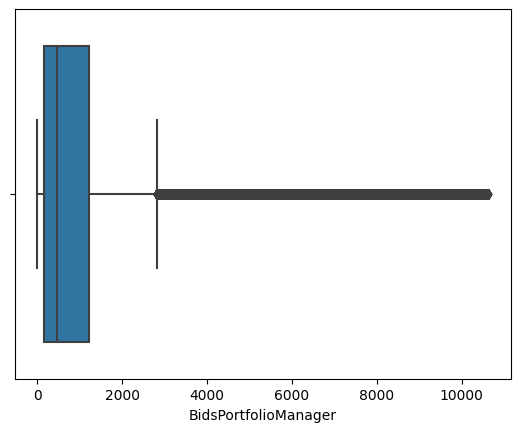

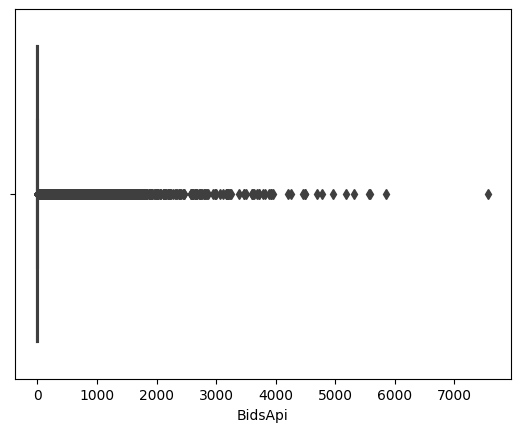

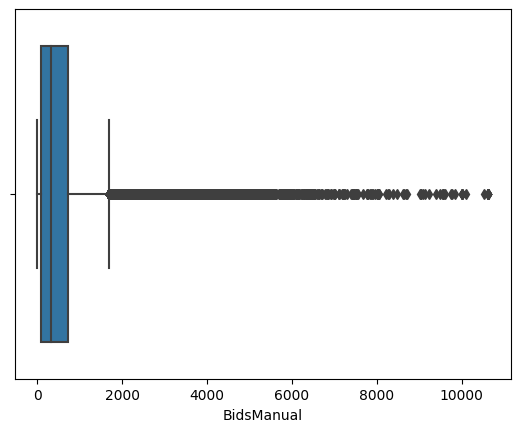

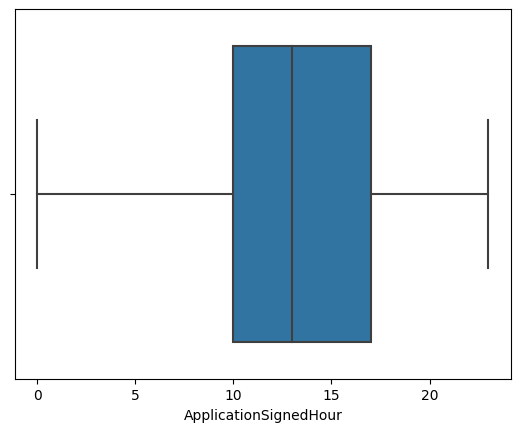

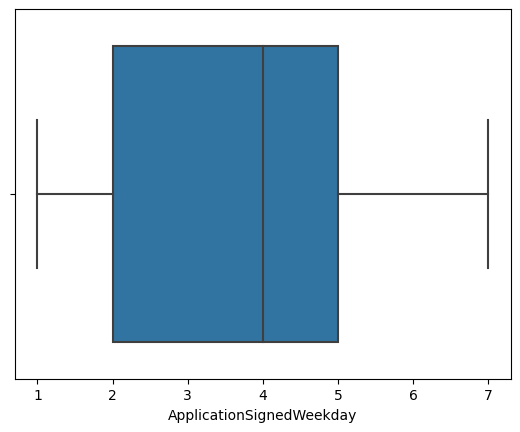

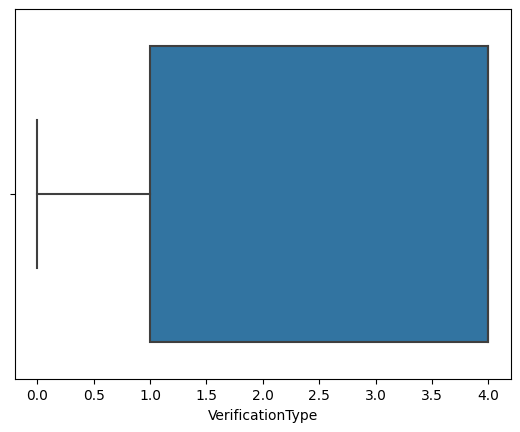

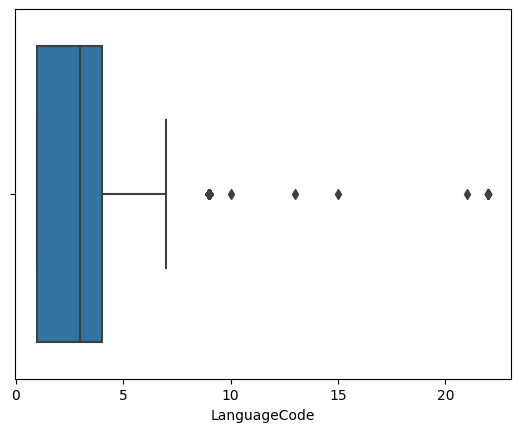

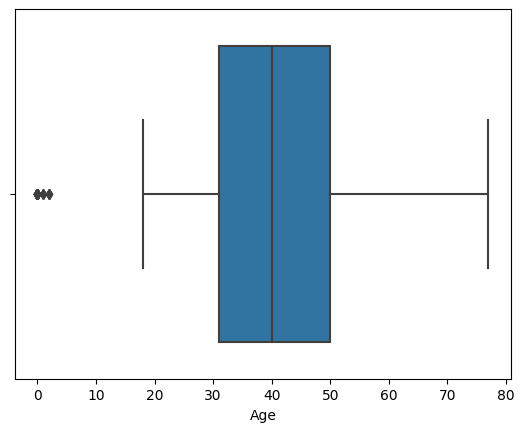

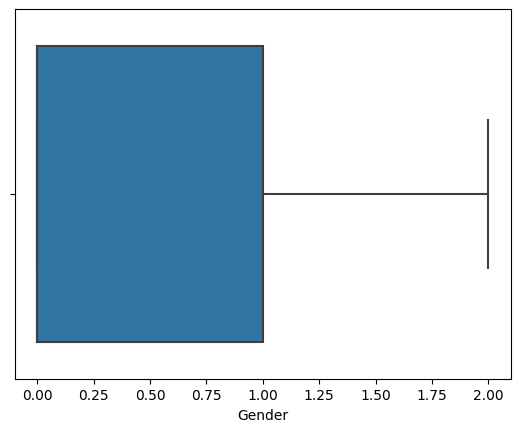

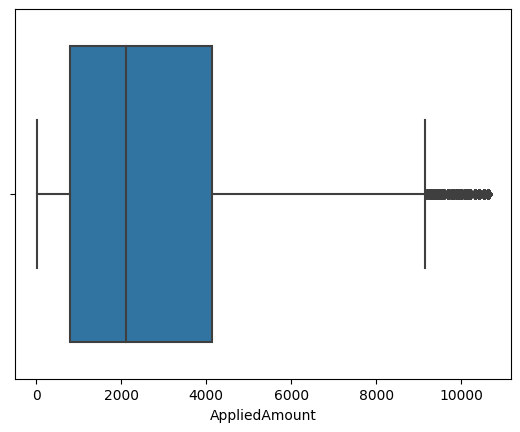

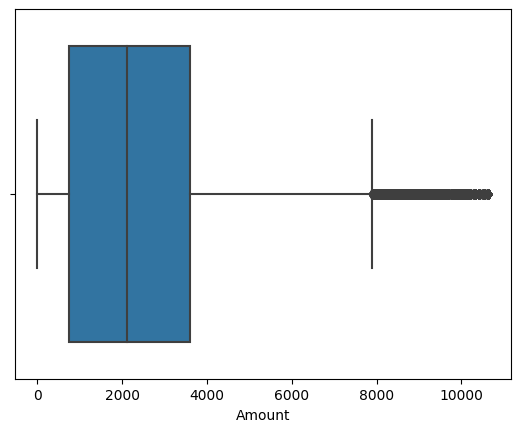

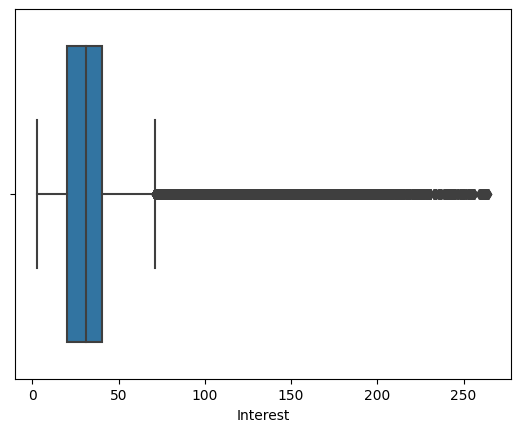

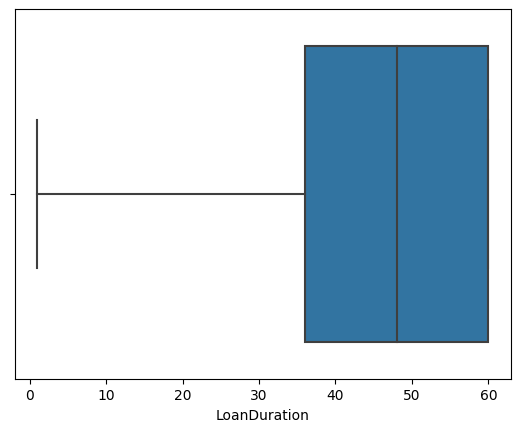

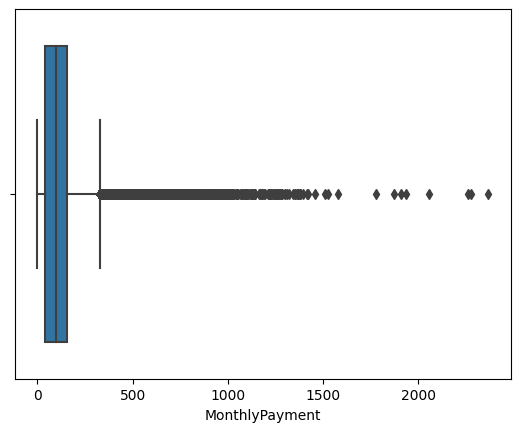

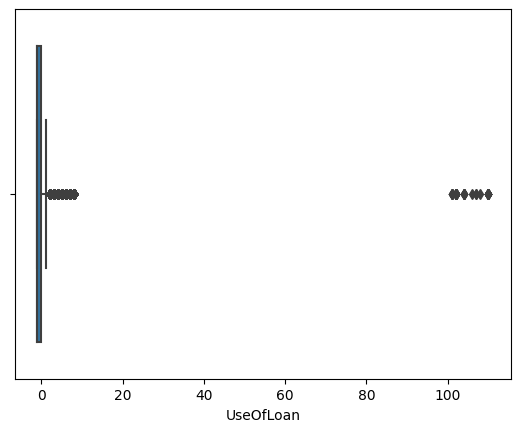

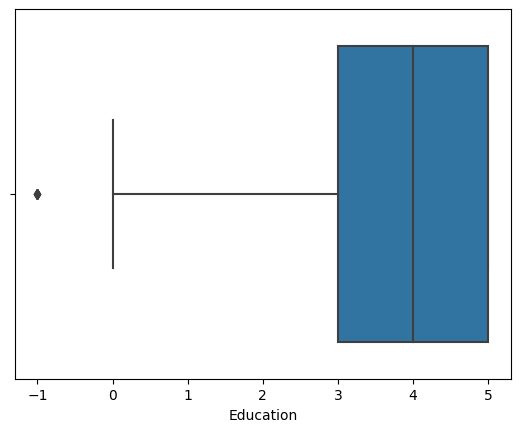

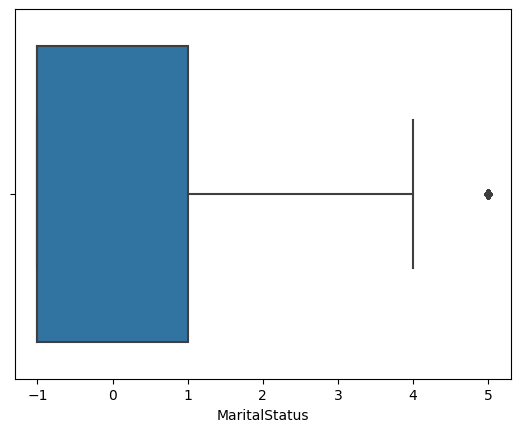

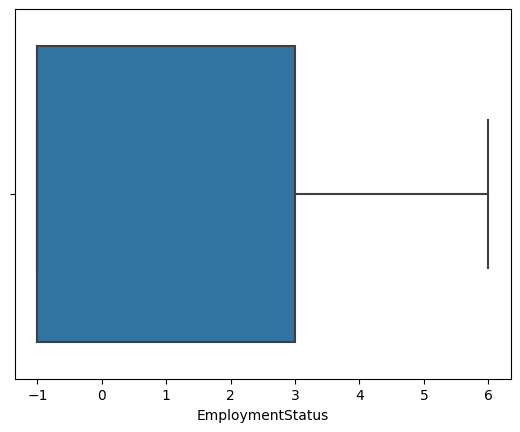

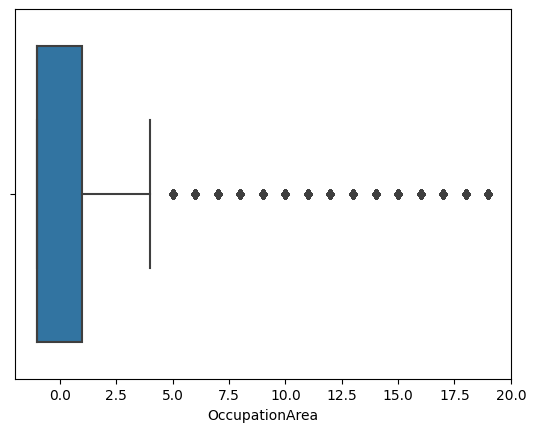

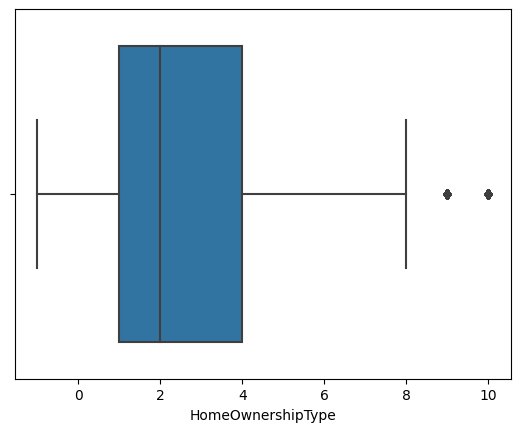

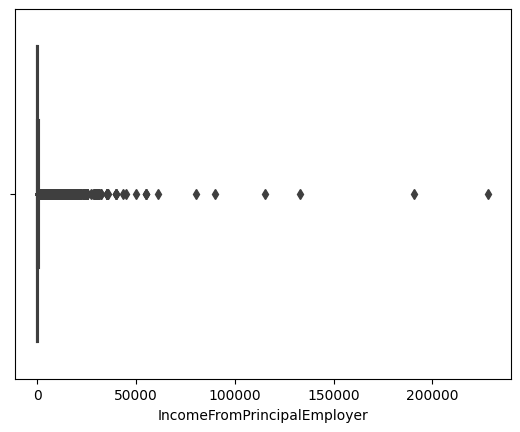

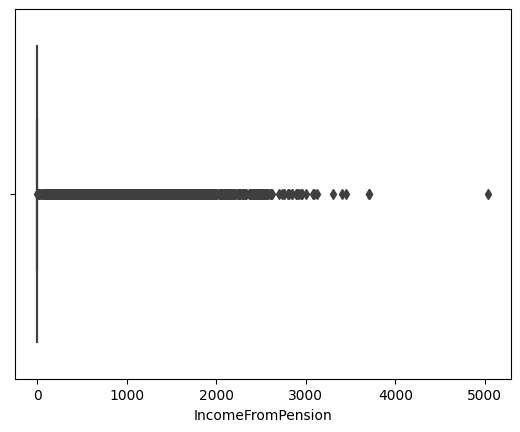

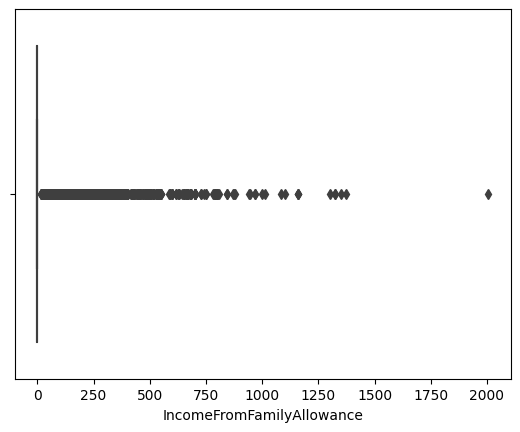

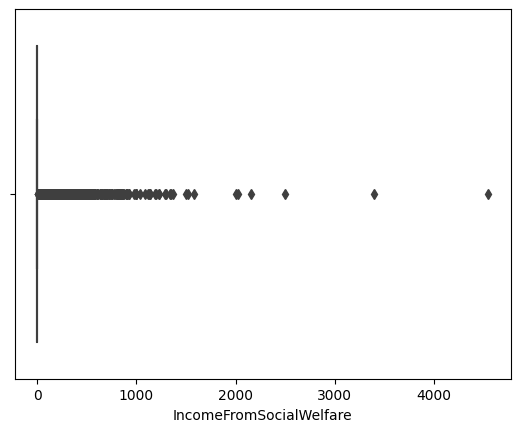

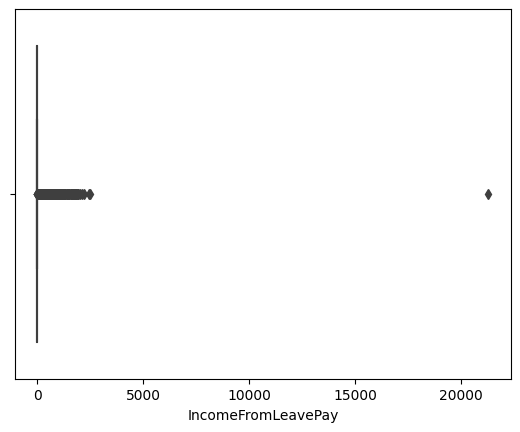

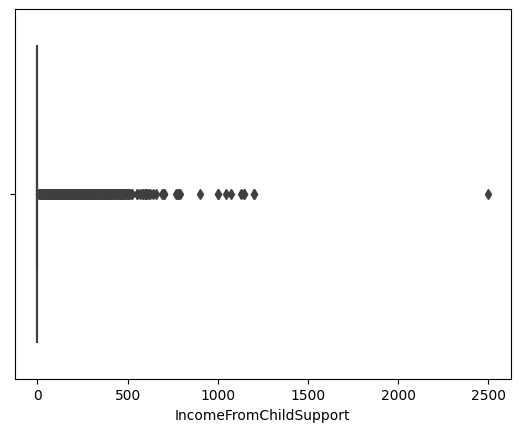

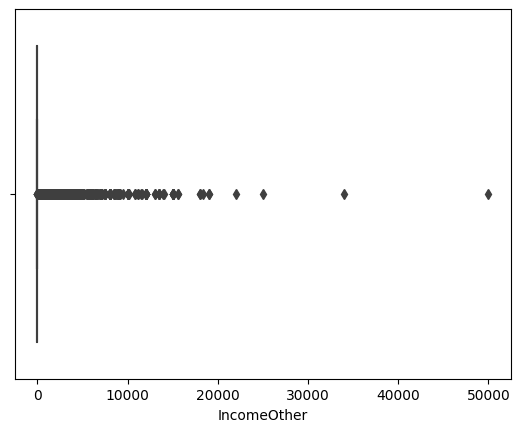

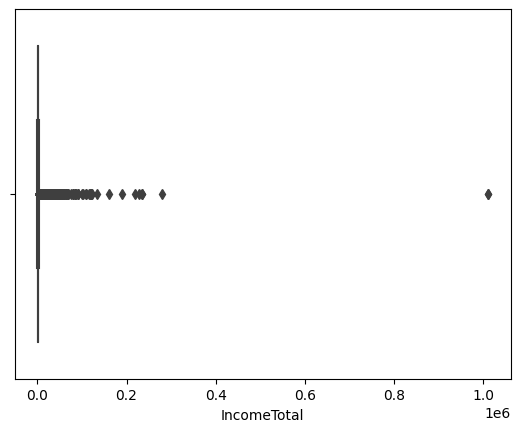

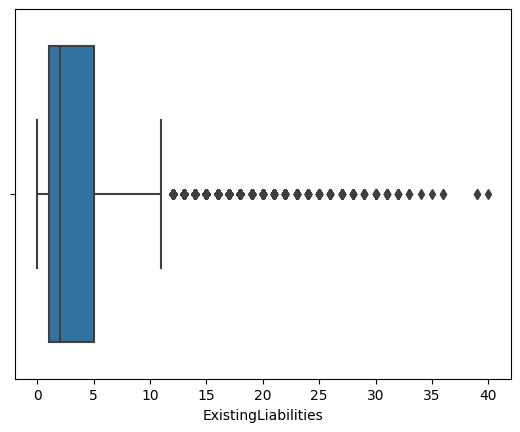

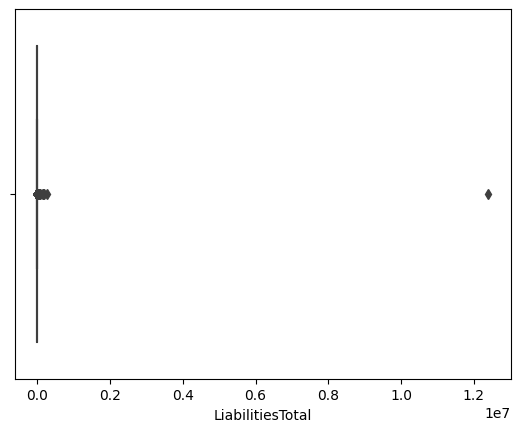

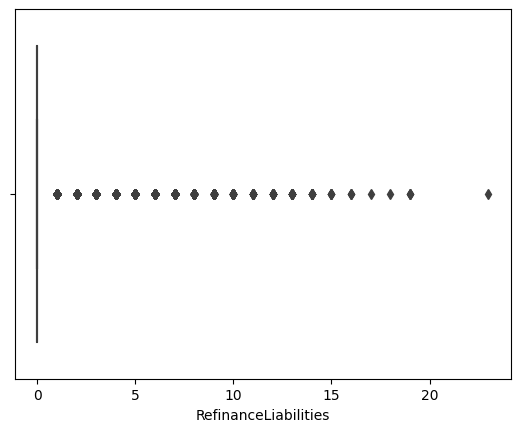

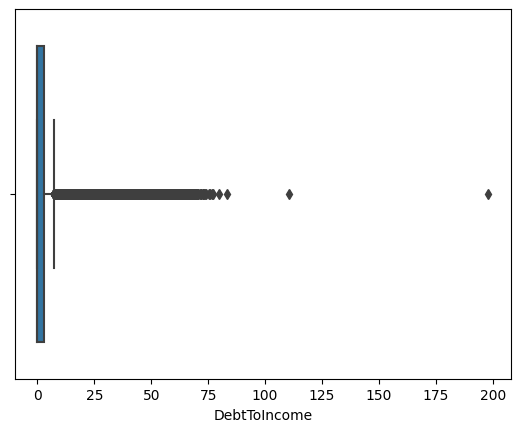

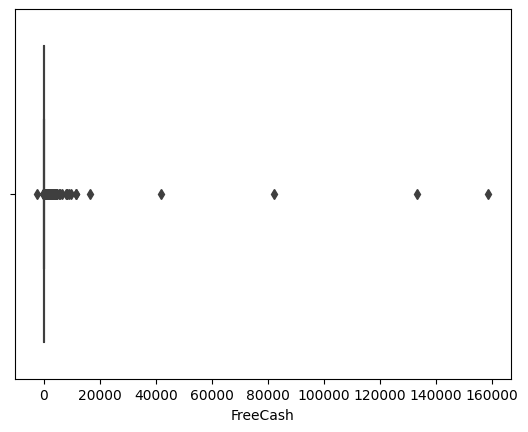

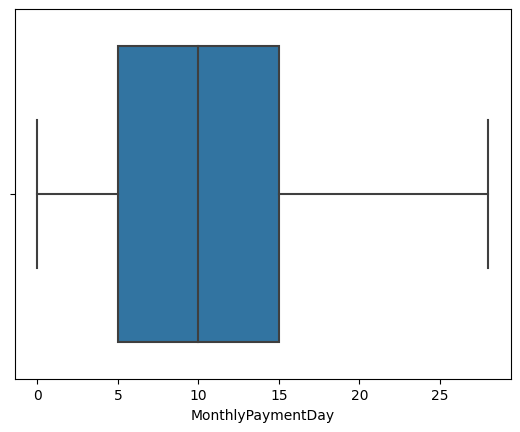

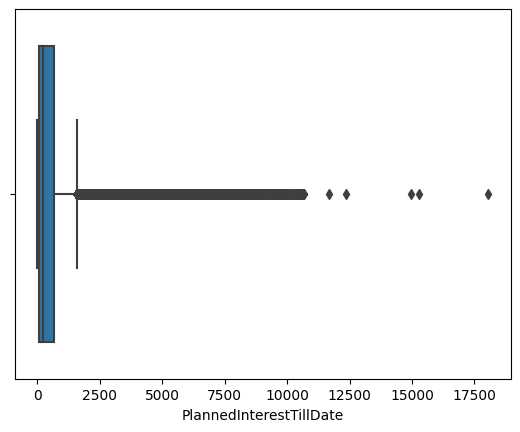

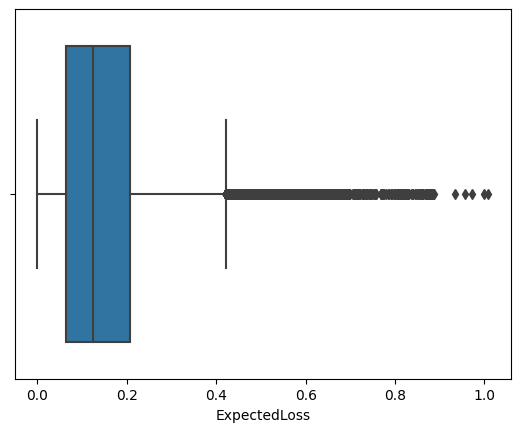

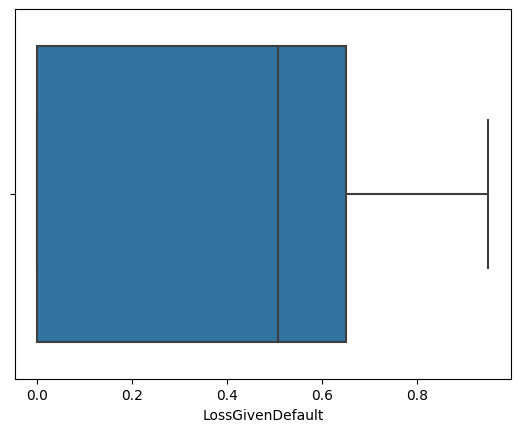

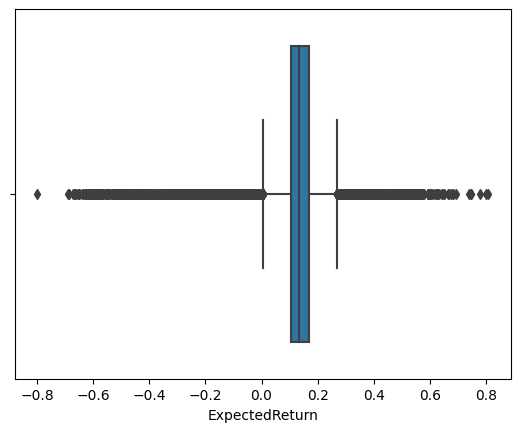

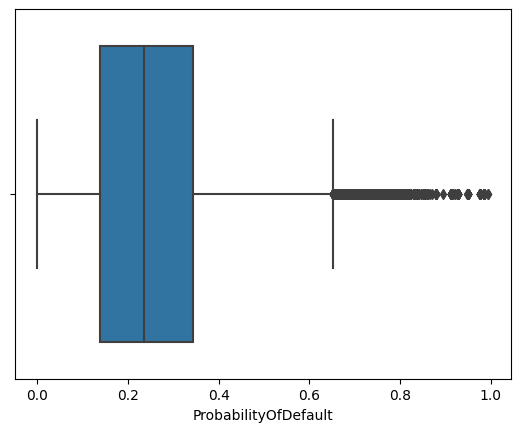

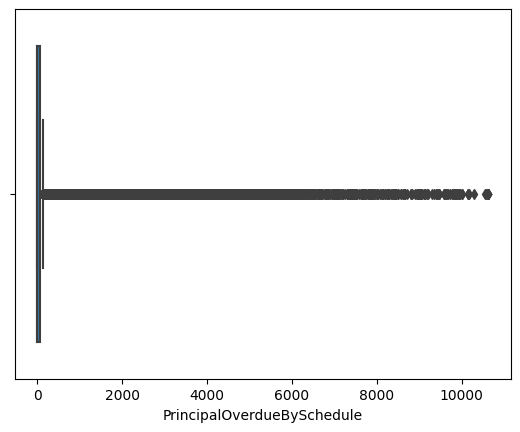

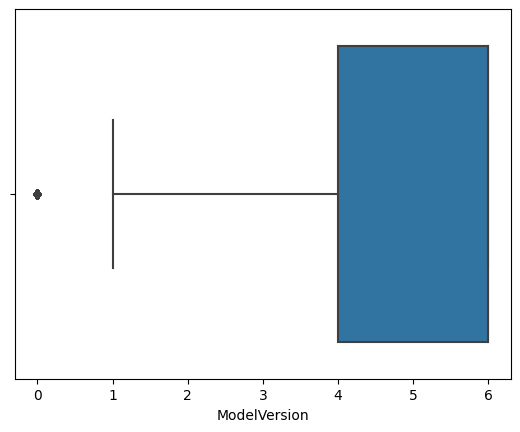

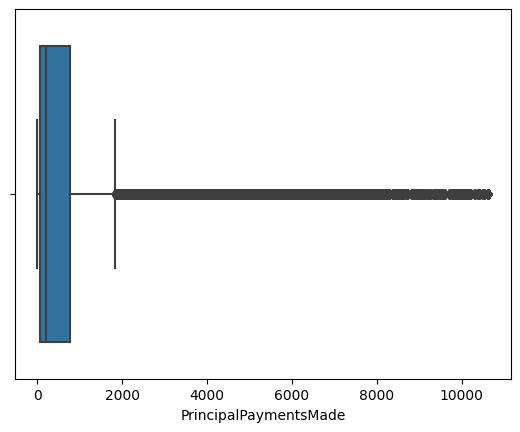

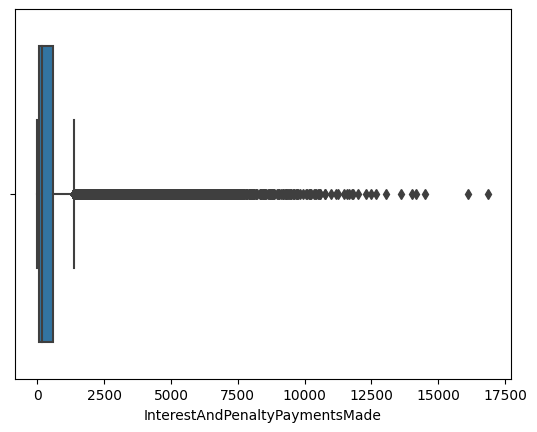

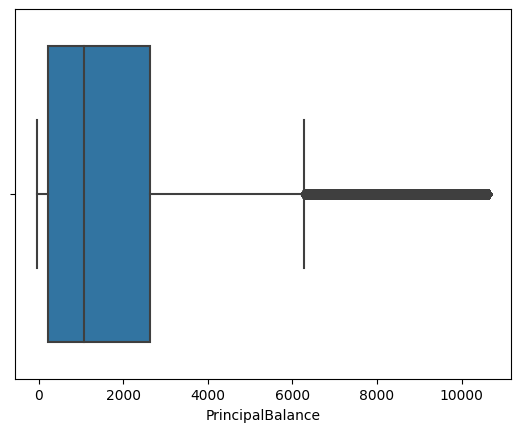

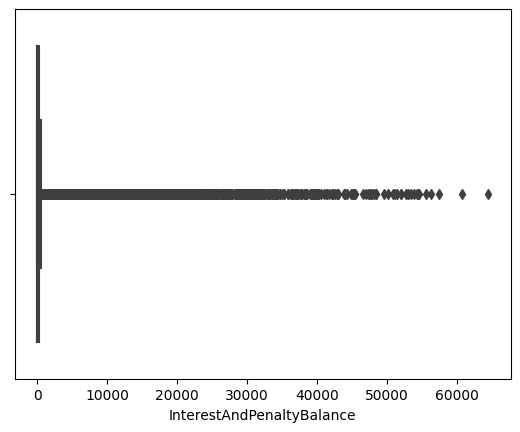

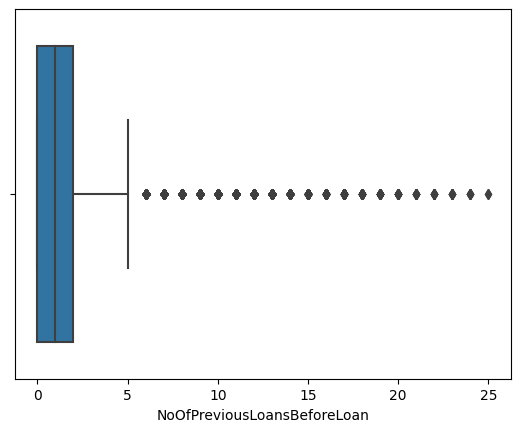

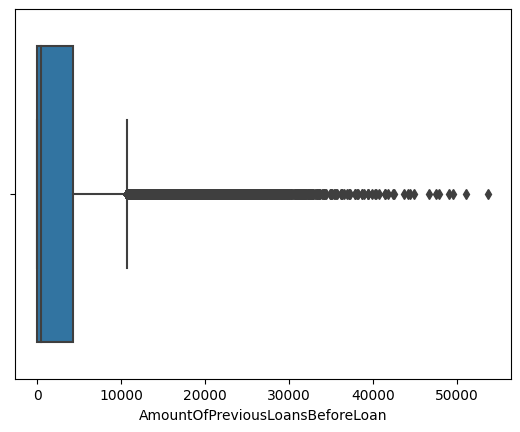

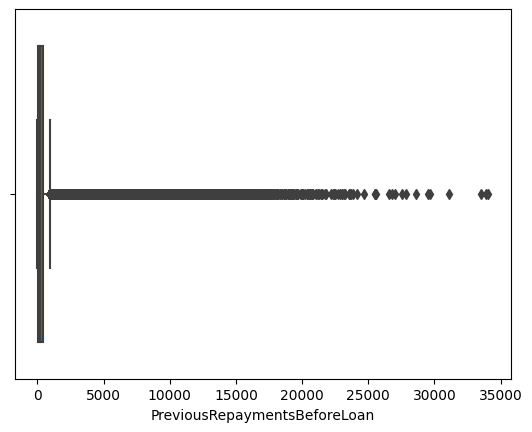

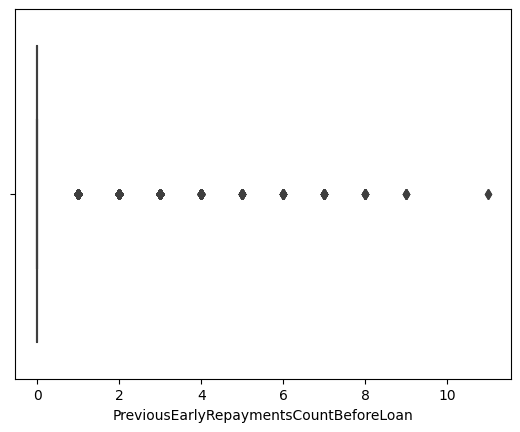

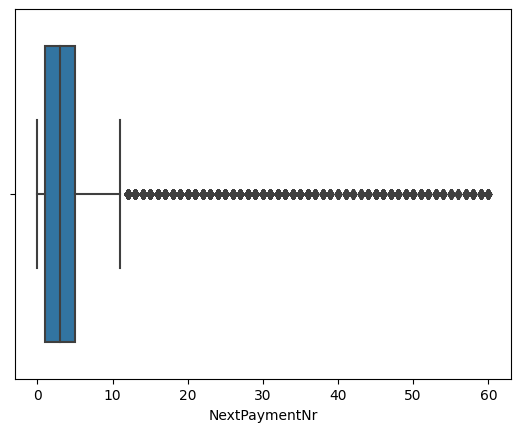

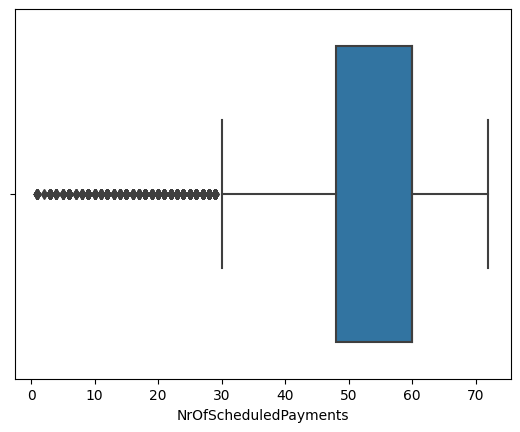

In [30]:
for i in numerical_columns:
  sns.boxplot(x=df[i])
  plt.show();

In [31]:
def remove_outliers(colu):
  sorted(colu)
  Q1,Q3 = colu.quantile([0.25,0.75])
  IQR = Q3 - Q1
  lower_limit = Q1 - (1.5*IQR)
  upper_limit = Q3 + (1.5*IQR)
  return lower_limit, upper_limit

In [32]:
for i in numerical_columns:
  low_limit_col, up_limit_col = remove_outliers(df[i])
  df[i] = np.where(df[i] > up_limit_col, up_limit_col, df[i])
  df[i] = np.where(df[i] < low_limit_col, low_limit_col, df[i])

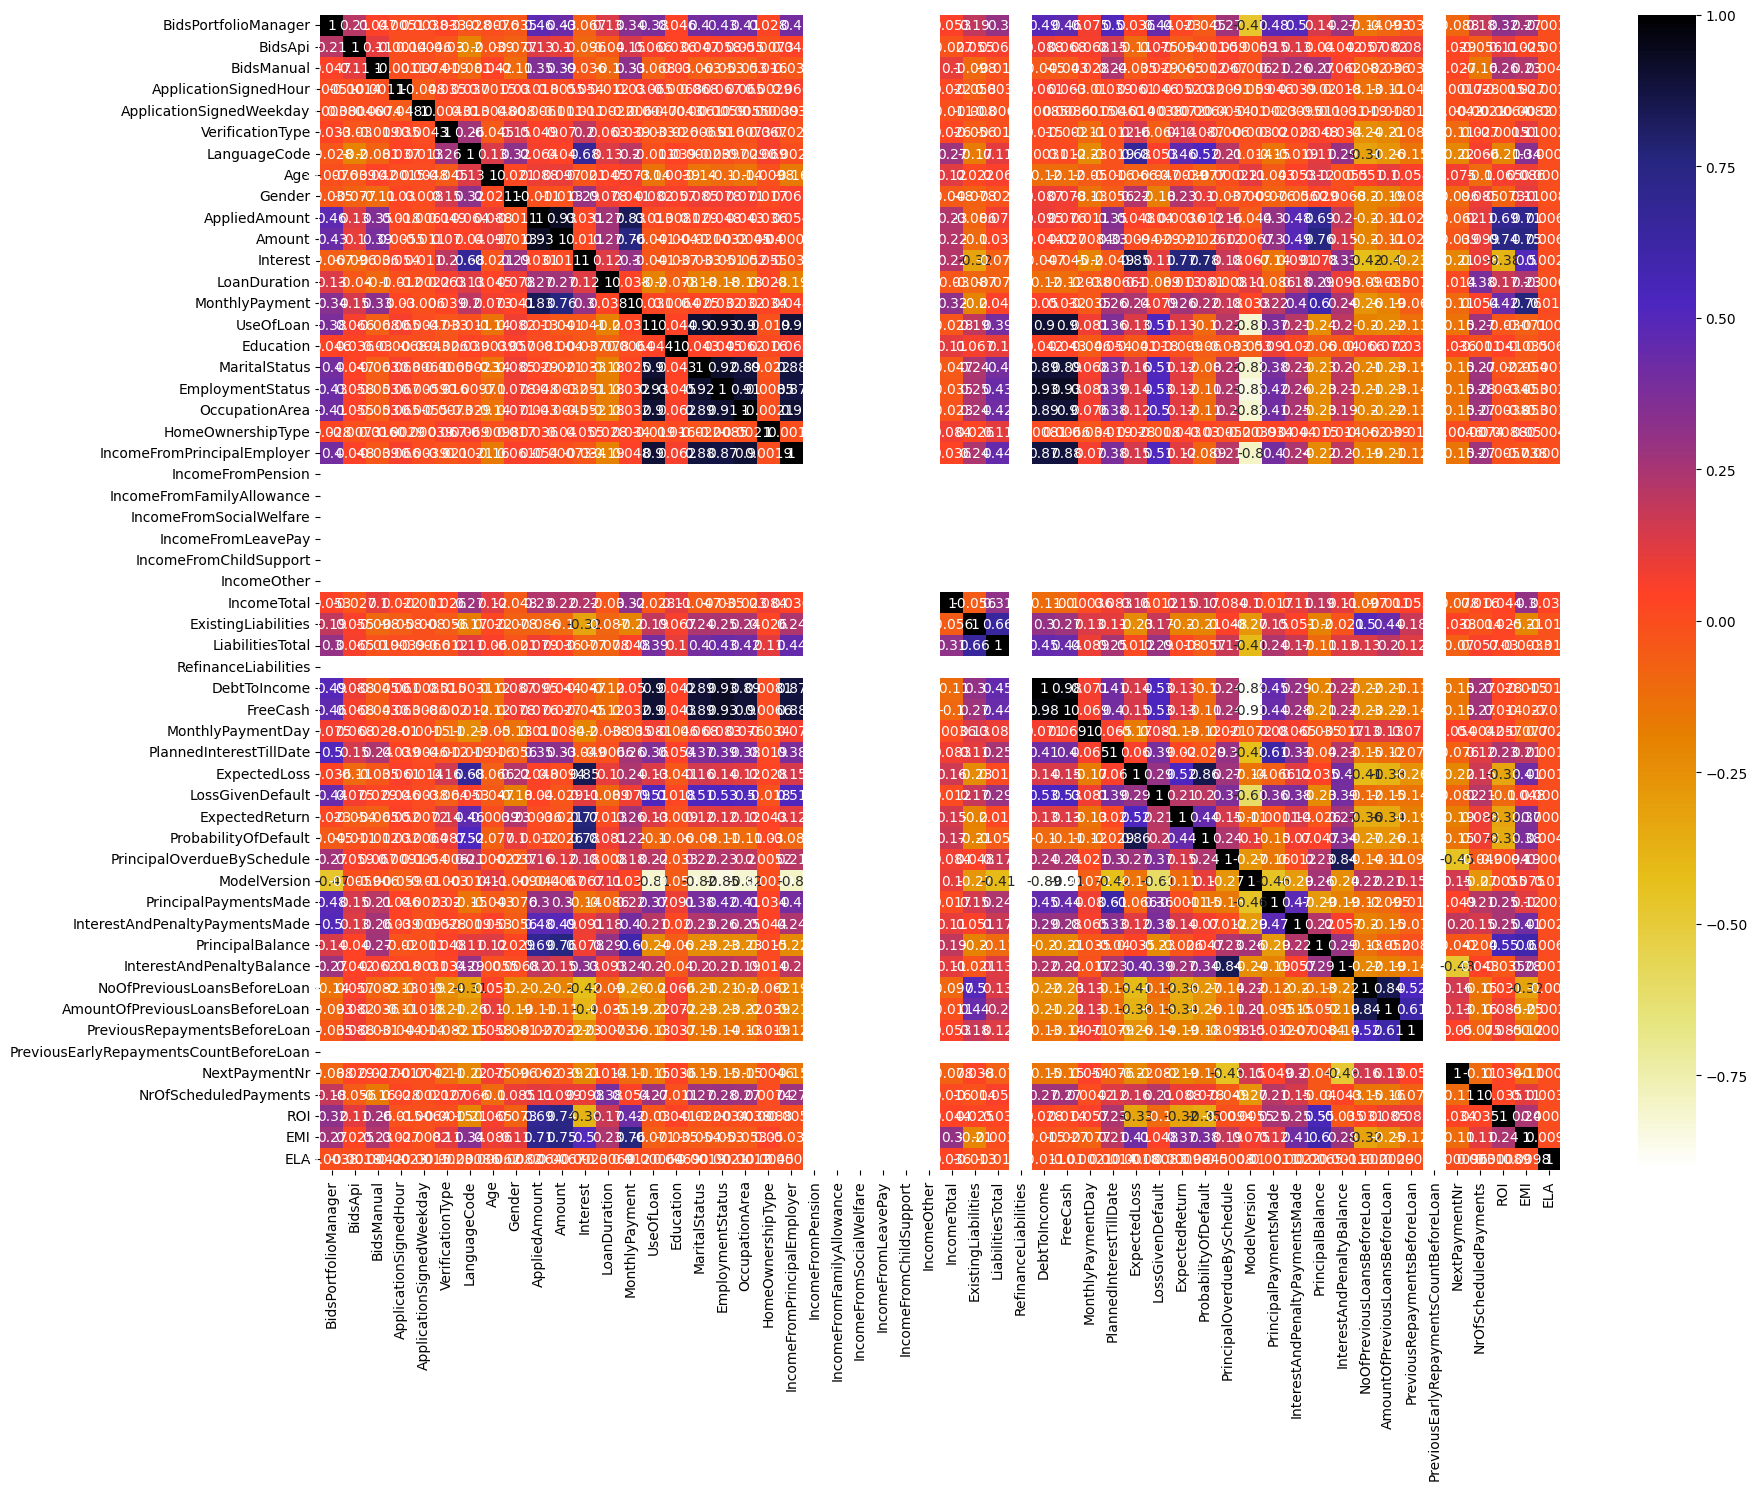

In [33]:
plt.figure(figsize = (20,15))
cor = df.corr()
sns.heatmap(cor, annot = True, cmap=plt.cm.CMRmap_r)
plt.show();

We will create a function that will select highly correlated features.

In [34]:
def correlation(data, threshold):
  feature_correlation = set()
  correlation_matrix = data.corr()
  for i in range(len(correlation_matrix.columns)):
    for j in range(i):
      if abs(correlation_matrix.iloc[i, j]) > threshold:
        column_name = correlation_matrix.columns[i]
        feature_correlation.add(column_name)
  return feature_correlation

In [35]:
highly_corr_features = correlation(df, 0.80)

In [36]:
highly_corr_features

{'Amount',
 'AmountOfPreviousLoansBeforeLoan',
 'DebtToIncome',
 'EmploymentStatus',
 'ExpectedLoss',
 'FreeCash',
 'IncomeFromPrincipalEmployer',
 'InterestAndPenaltyBalance',
 'MaritalStatus',
 'ModelVersion',
 'MonthlyPayment',
 'OccupationArea',
 'ProbabilityOfDefault'}

We can drop the highly correlated features but we have to make sure that they don't affect the analysis.

In [37]:
#df.drop(columns=list(highly_corr_features), inplace = True)

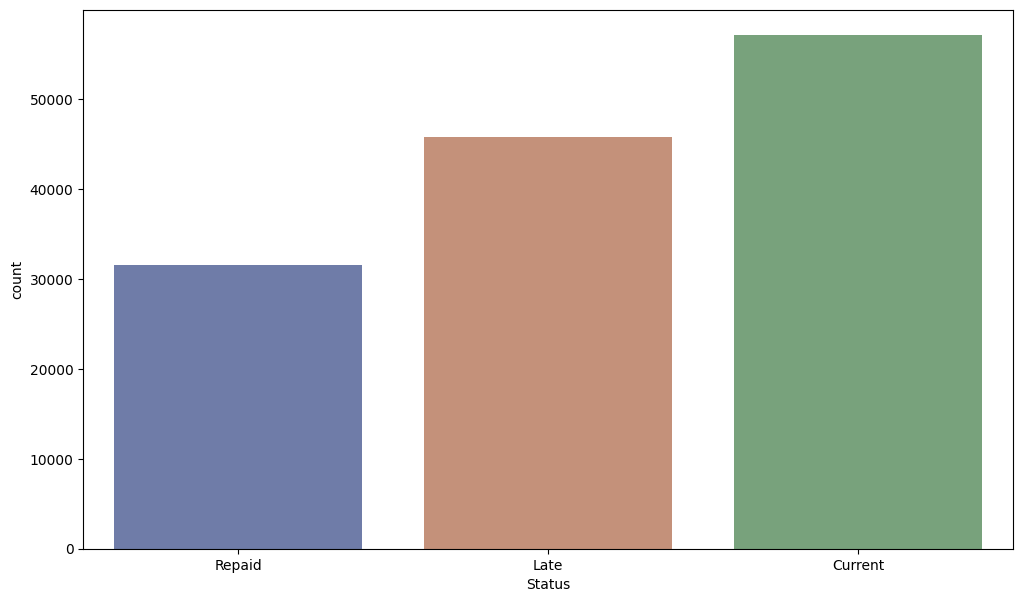

In [38]:
plt.figure(figsize=(12,7))
sns.countplot(x='Status', data =df, palette="dark", alpha=.6);

In [39]:
df['Gender'] = df['Gender'].replace({0:'Male', 1:'Female', 2:'Undefined'})

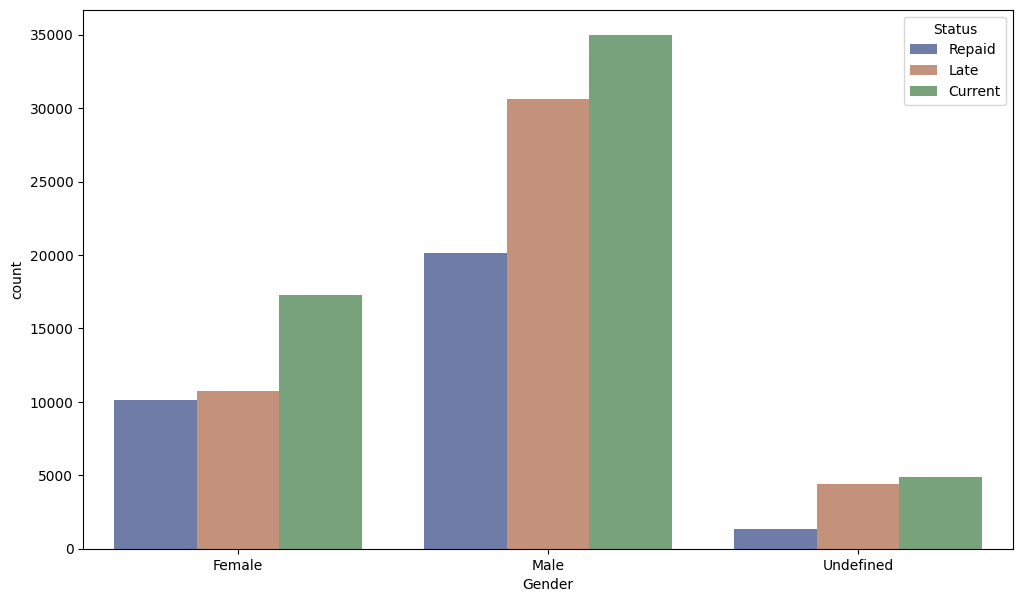

In [40]:
plt.figure(figsize=(12,7))
sns.countplot(x='Gender',hue='Status', data =df, palette="dark", alpha=.6);

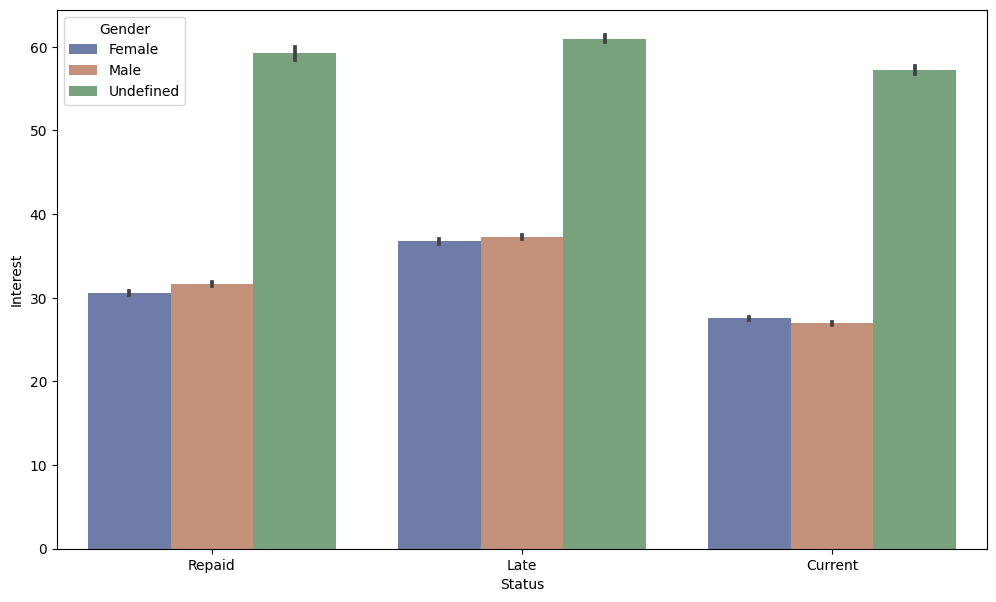

In [41]:
plt.figure(figsize=(12,7))
sns.barplot(x='Status', y='Interest', hue='Gender',data=df, palette="dark", alpha=.6);

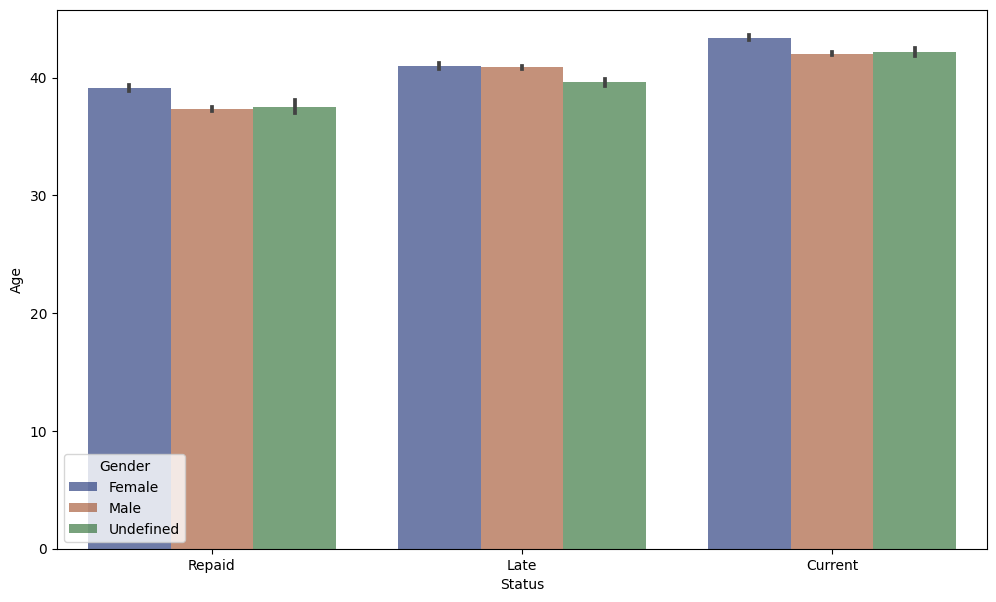

In [42]:
plt.figure(figsize=(12,7))
sns.barplot(x='Status', y='Age', hue='Gender',data=df, palette="dark", alpha=.6);

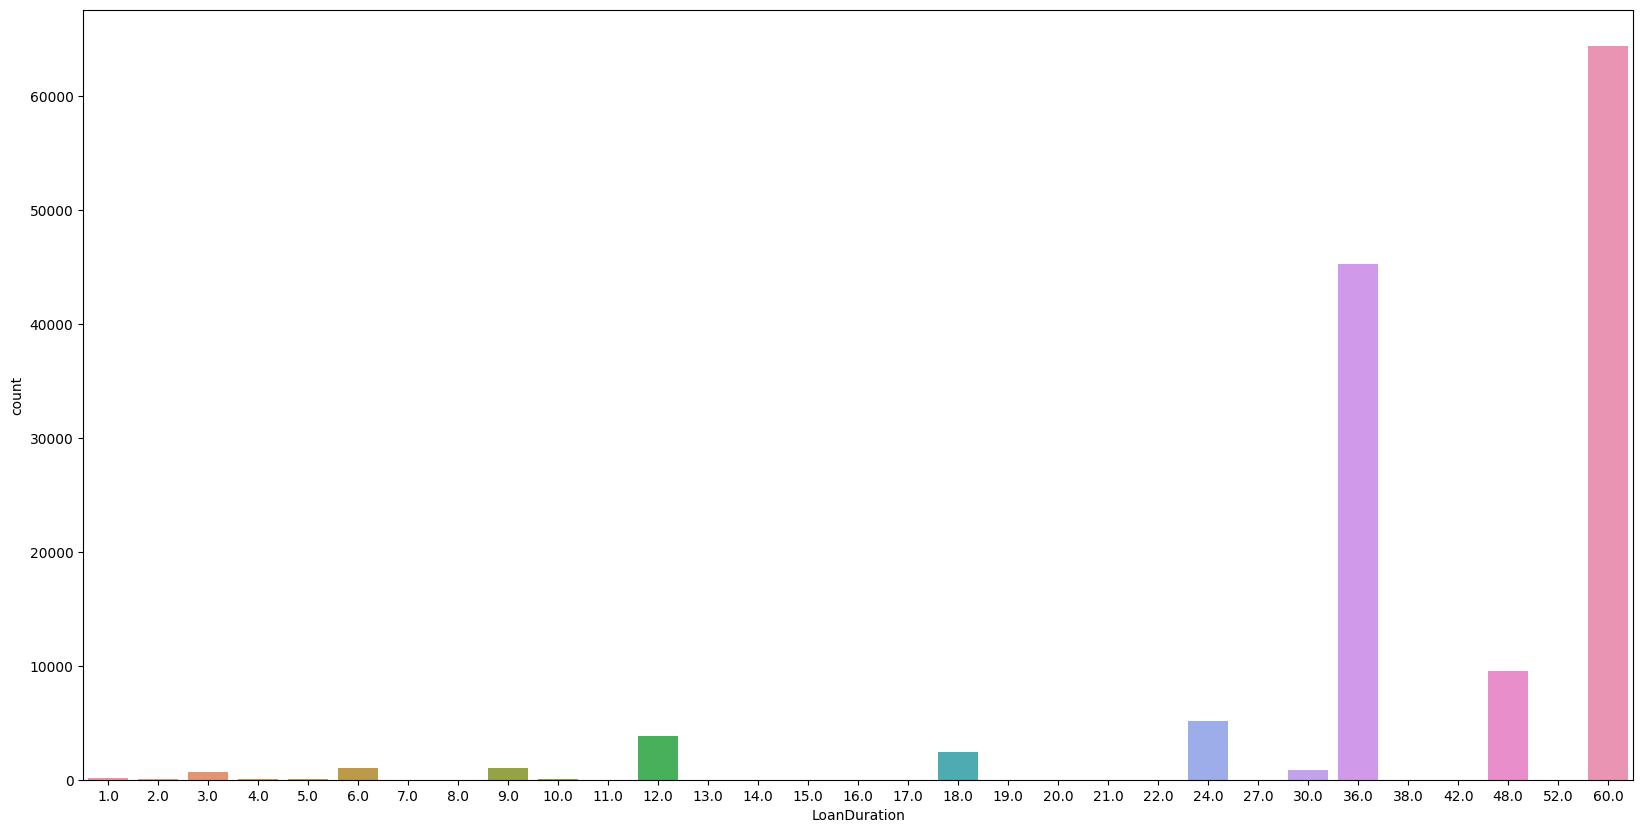

In [43]:
plt.figure(figsize=(20,10))
sns.countplot(x='LoanDuration', data =df);

Almost 50% of the Loan Duration is 60.

In [44]:
df['Country'] = df['Country'].replace({'EE':'Estonia','FI':'Finland','ES':'Spain','SK':'Slovakia'})

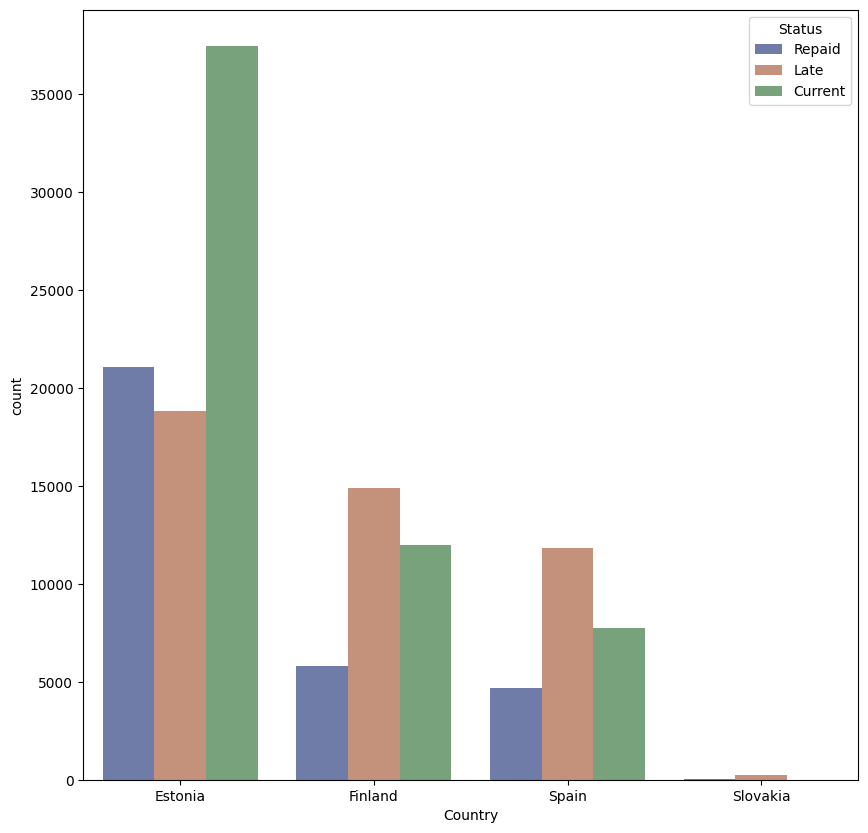

In [45]:
plt.figure(figsize=(10,10))
sns.countplot(x='Country', hue='Status', data =df, palette="dark", alpha=.6);

In [46]:
df.Education.unique()

array([3., 5., 4., 2., 1., 0.])

In [47]:
df['Education'] = df['Education'].replace({0:'No Education',1:'Primary education',2:'Basic education', 3:'Vocational education', 4:'Secondary education',5:'Higher education'})

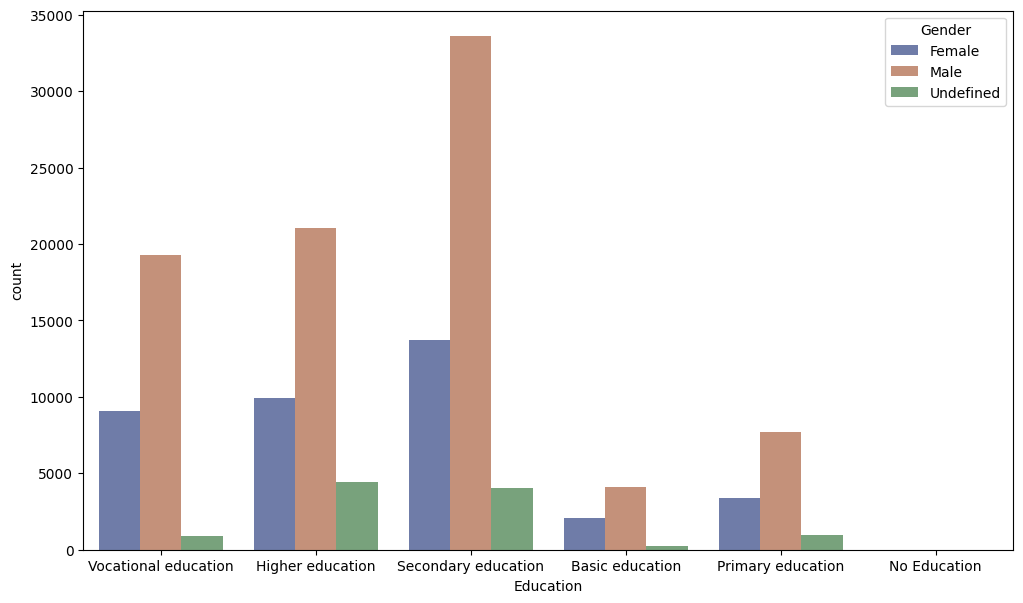

In [48]:
plt.figure(figsize=(12,7))
sns.countplot(x='Education',hue='Gender', data =df, palette="dark", alpha=.6);

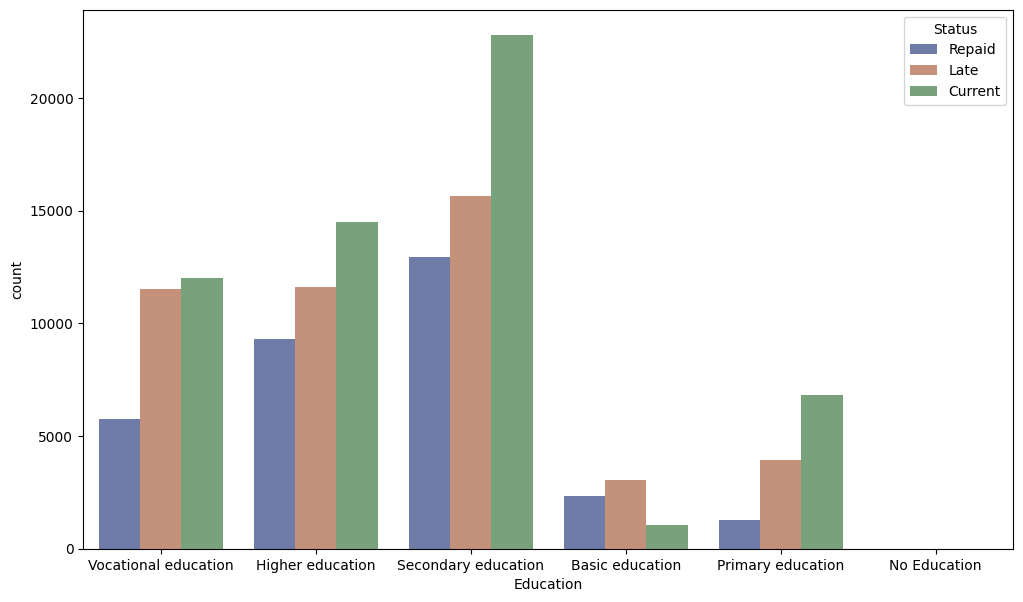

In [49]:
plt.figure(figsize=(12,7))
sns.countplot(x='Education',hue='Status', data =df, palette="dark", alpha=.6);

In [50]:
df['Status'].unique()

array(['Repaid', 'Late', 'Current'], dtype=object)

In [51]:
Current_Index = df[df['Status']=='Current']

In [52]:
Current_Index

,ReportAsOfEOD,BidsPortfolioManager,BidsApi,BidsManual,NewCreditCustomer,LoanApplicationStartedDate,LoanDate,FirstPaymentDate,MaturityDate_Original,MaturityDate_Last,...,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,NextPaymentNr,NrOfScheduledPayments,ROI,EMI,ELA
491,2020-01-27,1355.0,0.0,645.0,True,2015-01-02 08:08:53,2015-01-06,2015-02-16,2020-01-15,2021-01-15,...,0.0,0.0,0.0,0.000,0.0,11.0,56.0,8176.614881,48920.0,1468.00
523,2020-01-27,1000.0,0.0,0.0,False,2015-01-07 08:46:29,2015-01-07,2015-03-06,2020-02-06,2021-11-08,...,0.0,1.0,1300.0,187.870,0.0,9.0,30.0,5636.978579,17740.0,-767.37
536,2020-01-27,2345.0,0.0,655.0,False,2015-01-07 12:43:52,2015-01-07,2015-02-16,2020-01-14,2024-02-23,...,0.0,1.0,1000.0,623.890,0.0,11.0,60.0,16787.912703,53610.0,317.97
541,2020-01-27,2045.0,0.0,955.0,True,2015-01-03 12:55:15,2015-01-08,2015-02-20,2020-01-20,2021-01-04,...,0.0,0.0,0.0,0.000,0.0,1.0,30.0,10721.944246,83940.0,575.00
544,2020-01-27,1500.0,0.0,0.0,True,2015-01-07 14:39:33,2015-01-08,2015-02-25,2020-01-27,2020-01-27,...,0.0,0.0,0.0,0.000,0.0,3.0,60.0,5128.205128,43875.0,1035.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134429,2020-01-27,560.0,0.0,40.0,False,2014-12-26 18:27:55,2014-12-29,2015-02-25,2019-01-25,2022-05-25,...,0.0,2.0,7000.0,955.815,0.0,11.0,60.0,2000.000000,18000.0,408.67
134455,2020-01-27,2175.0,0.0,1678.5,True,2014-12-30 15:18:33,2014-12-30,2015-02-25,2020-01-27,2020-01-27,...,0.0,0.0,0.0,0.000,0.0,3.0,60.0,16896.551724,142100.0,15.69
134483,2020-01-27,1000.0,0.0,0.0,True,2015-01-02 12:07:44,2015-01-02,2015-02-16,2020-01-15,2024-02-15,...,0.0,0.0,0.0,0.000,0.0,3.0,51.0,4595.588235,21760.0,750.00
134486,2020-01-27,635.0,0.0,1678.5,True,2014-12-31 16:20:05,2015-01-02,2015-02-12,2020-01-13,2021-12-15,...,0.0,0.0,0.0,0.000,0.0,11.0,60.0,8099.565389,207542.0,18.00


In [53]:
current_Index = df[df['Status']=='Current'].index

In [54]:
data = df.drop(current_Index)

In [55]:
data['Status'].unique()

array(['Repaid', 'Late'], dtype=object)

In [56]:
data['Education'] = data['Education'].replace({'No Education':0,'Primary education':1,'Basic education':2, 'Vocational education':3, 'Secondary education':4,'Higher education':5})

In [57]:
data['Education'].unique()

array([3, 5, 4, 2, 1, 0], dtype=int64)

In [58]:
data['Status'] = data['Status'].replace({'Late':0,'Repaid':1})

In [59]:
data.shape

(77394, 74)

In [60]:
data['Gender'] = data['Gender'].replace({'Male':0, 'Female':1, 'Undefined':2})

In [61]:
#df.drop(columns=highly_corr_features, inplace = True)

In [62]:
data.select_dtypes(include=['int']).columns.to_list()

['Gender', 'Education', 'Status']

In [63]:
cat_features = data.select_dtypes(include=['object','bool']).columns.to_list()

In [64]:
data.head()

,ReportAsOfEOD,BidsPortfolioManager,BidsApi,BidsManual,NewCreditCustomer,LoanApplicationStartedDate,LoanDate,FirstPaymentDate,MaturityDate_Original,MaturityDate_Last,...,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,NextPaymentNr,NrOfScheduledPayments,ROI,EMI,ELA
0,2020-01-27,0.0,0.0,115.0410,True,2009-06-11 16:40:39,2009-06-16,2009-07-27,2010-06-25,2010-06-25,...,0.00,1.0,83.0852,0.0000,0.0,3.0,60.0,383.469333,3451.2240,10500.0
1,2020-01-27,0.0,0.0,140.6057,False,2009-06-10 15:48:57,2009-06-15,2009-07-15,2009-07-15,2009-07-15,...,0.00,2.0,255.6467,258.6256,0.0,3.0,60.0,562.422800,3655.7482,10800.0
2,2020-01-27,0.0,0.0,319.5580,True,2009-06-05 19:12:29,2009-06-15,2009-07-27,2011-02-25,2014-05-13,...,414.07,0.0,0.0000,0.0000,0.0,3.0,60.0,1278.163600,7988.5225,7000.0
3,2020-01-27,0.0,0.0,57.5205,True,2009-06-13 12:01:20,2009-06-15,2009-07-15,2010-09-15,2010-09-15,...,0.00,1.0,134.2144,0.0000,0.0,3.0,60.0,127.823333,2588.4225,11600.0
4,2020-01-27,0.0,0.0,319.5582,True,2009-06-10 10:17:13,2009-06-14,2009-07-27,2010-06-25,2010-06-25,...,0.00,1.0,146.9966,0.0000,0.0,3.0,60.0,1065.145333,9586.3080,6800.0


In [65]:
for i in cat_features:
  print(f'{i} :', data[i].nunique())

ReportAsOfEOD : 1
NewCreditCustomer : 2
LoanApplicationStartedDate : 77343
LoanDate : 3490
FirstPaymentDate : 2123
MaturityDate_Original : 3085
MaturityDate_Last : 3294
DateOfBirth : 16080
Country : 4
County : 960
City : 6625
EmploymentDurationCurrentEmployer : 9
ActiveScheduleFirstPaymentReached : 2
LastPaymentOn : 2888
StageActiveSince : 29132
Rating : 8
Restructured : 2
WorseLateCategory : 9
CreditScoreEsMicroL : 11


In [66]:
data['City'].unique()

array(['TALLINN', 'KOHTLA-JARVE', 'PÄRNU', ..., 'GRANJA DE TORREHERMOSA',
       'BENAVENTE', 'VEĽKÉ DRŽKOVCE'], dtype=object)

In [67]:
data['LoanApplicationStartedDate'].unique()

array(['2009-06-11 16:40:39', '2009-06-10 15:48:57',
       '2009-06-05 19:12:29', ..., '2014-12-28 15:01:47',
       '2015-01-05 15:01:18', '2015-01-05 20:50:24'], dtype=object)

Remove these columns : DateOfBirth, ReportAsOfEOD, City, County

ReportAsOfEOD has only one unique value

We have the Age column which can replace the DateOfBirth column

In [68]:
data.drop(columns = ['DateOfBirth','ReportAsOfEOD', 'City', 'County'], inplace = True)

In [69]:
highly_correlated_features = correlation(data, 0.80)

In [70]:
highly_correlated_features

{'Amount',
 'AmountOfPreviousLoansBeforeLoan',
 'DebtToIncome',
 'EmploymentStatus',
 'ExpectedLoss',
 'FreeCash',
 'IncomeFromPrincipalEmployer',
 'MaritalStatus',
 'ModelVersion',
 'OccupationArea',
 'ProbabilityOfDefault'}

Convert String Date Columns to Date Time:

* LoanApplicationStartedDate 
* LoanDate 
* FirstPaymentDate 
* MaturityDate_Original
* MaturityDate_Last
* LastPaymentOn
* StageActiveSince


In [71]:
date_columns = ['LoanApplicationStartedDate','LoanDate','FirstPaymentDate','MaturityDate_Original','MaturityDate_Last','LastPaymentOn','StageActiveSince']
for i in date_columns:
  data[i] = pd.to_datetime(data[i], format = '%Y-%m-%d %H:%M:%S')

In [72]:
for i in date_columns:
  data[f'{i}_year'] = data[i].dt.year
  data[f'{i}_month'] = data[i].dt.month
  data[f'{i}_week'] = data[i].dt.week
  data[f'{i}_day'] = data[i].dt.day

In [73]:
data.drop(columns= date_columns, inplace=True)

In [74]:
cat_features = data.select_dtypes(include=['object','bool']).columns.to_list()
for i in cat_features:
  print(f'{i} :', data[i].nunique())

NewCreditCustomer : 2
Country : 4
EmploymentDurationCurrentEmployer : 9
ActiveScheduleFirstPaymentReached : 2
Rating : 8
Restructured : 2
WorseLateCategory : 9
CreditScoreEsMicroL : 11


In [75]:
data = pd.get_dummies(data, drop_first = True)

Interpreting Mutual Information Scores

In [107]:
X = data.drop(['Status', 'ROI', 'EMI', 'ELA'], axis=1)
y_cls = data['Status']
y_reg = data[['ROI', 'EMI', 'ELA']]

In [108]:
X.shape, y_cls.shape, y_reg.shape

((77394, 118), (77394,), (77394, 3))

In [109]:
X.head()

,BidsPortfolioManager,BidsApi,BidsManual,ApplicationSignedHour,ApplicationSignedWeekday,VerificationType,LanguageCode,Age,Gender,AppliedAmount,...,CreditScoreEsMicroL_M1,CreditScoreEsMicroL_M10,CreditScoreEsMicroL_M2,CreditScoreEsMicroL_M3,CreditScoreEsMicroL_M4,CreditScoreEsMicroL_M5,CreditScoreEsMicroL_M6,CreditScoreEsMicroL_M7,CreditScoreEsMicroL_M8,CreditScoreEsMicroL_M9
0,0.0,0.0,115.0410,17.0,5.0,2.0,1.0,61.0,1,319.5582,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0.0,140.6057,20.0,4.0,2.0,1.0,48.0,1,191.7349,...,0,0,0,0,0,0,0,0,0,0
2,0.0,0.0,319.5580,20.0,6.0,2.0,1.0,58.0,1,319.5582,...,0,0,0,0,0,0,0,0,0,0
3,0.0,0.0,57.5205,12.0,7.0,2.0,1.0,23.0,1,127.8233,...,0,0,0,0,0,0,0,0,0,0
4,0.0,0.0,319.5582,10.0,4.0,2.0,1.0,25.0,1,319.5582,...,0,0,0,0,0,0,0,0,0,0


In [110]:
# X = X[['AppliedAmount', 'Amount', 'Interest', 'LoanDuration', 'MonthlyPayment',
#        'PlannedInterestTillDate', 'ExpectedLoss', 'LossGivenDefault', 'MaturityDate_Original_year', 'StageActiveSince_year']]

In [111]:
# X = X[['AppliedAmount', 'Amount', 'Interest', 'LoanDuration', 'MonthlyPayment',
#        'PlannedInterestTillDate', 'ExpectedLoss', 'LossGivenDefault',
#        'ExpectedReturn', 'ProbabilityOfDefault']]

# For Classification 

In [112]:
min_max_scaler = MinMaxScaler()
scaled_X = min_max_scaler.fit_transform(X)


In [113]:
# Select the top 10 features based on mutual information
best_features = SelectKBest(score_func=mutual_info_classif, k=10)
fit = best_features.fit(scaled_X, y_cls)

# Get the scores and feature names
scores = fit.scores_
feature_names = X.columns

# Create a dataframe with the scores and feature names
feature_scores = pd.DataFrame({'Feature': feature_names, 'Score': scores})

# Sort the features by score (highest to lowest) and get the top 10
top_features = feature_scores.sort_values('Score', ascending=False).head(10)['Feature'].tolist()

# Print the top 10 features
print('Top 10 features:\n', top_features)


Top 10 features:
 ['InterestAndPenaltyBalance', 'PrincipalBalance', 'PrincipalPaymentsMade', 'PrincipalOverdueBySchedule', 'NextPaymentNr', 'StageActiveSince_week', 'StageActiveSince_month', 'StageActiveSince_day', 'NrOfScheduledPayments', 'MaturityDate_Last_year']


In [145]:
X = X[['PrincipalOverdueBySchedule', 'NextPaymentNr', 'StageActiveSince_week', 'StageActiveSince_month', 'StageActiveSince_day', 'NrOfScheduledPayments', 'MaturityDate_Last_year', 'Amount', 'Interest', 'LoanDuration', 'IncomeTotal', 'LiabilitiesTotal']]
# subset_df = df.loc[:, ['A', 'C']]
# print(scaled_X.columns)

In [146]:
X.shape

(77394, 12)

In [147]:
X.head()

,PrincipalOverdueBySchedule,NextPaymentNr,StageActiveSince_week,StageActiveSince_month,StageActiveSince_day,NrOfScheduledPayments,MaturityDate_Last_year,Amount,Interest,LoanDuration,IncomeTotal,LiabilitiesTotal
0,0.00,3.0,6,2,8,60.0,2010,115.0408,30.0,12.0,3464.5,0.0
1,0.00,3.0,6,2,8,60.0,2009,140.6057,25.0,1.0,3464.5,0.0
2,116.35,3.0,9,3,3,60.0,2014,319.5409,25.0,20.0,3464.5,0.0
3,0.00,3.0,6,2,8,60.0,2010,57.5205,45.0,15.0,3464.5,0.0
4,0.00,3.0,6,2,8,60.0,2010,319.5436,30.0,12.0,3464.5,0.0


In [148]:
x_train, x_test, y_train, y_test = train_test_split(X, y_cls, test_size = 0.2, random_state=42)

In [149]:
scale = Normalizer()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

## Logistic Regression 

In [150]:
# Create an instance of the KFold class
kf = KFold(n_splits=10, shuffle=True)

lr_model = LogisticRegression()

accuracies = cross_val_score(lr_model, x_train, y_train, cv=kf)

print("Average accuracy:", sum(accuracies) / len(accuracies))

Average accuracy: 0.8908504369099598


In [151]:
# Fit the logistic regression model
clf = LogisticRegression()
clf.fit(x_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(x_test)

# Calculate the model's performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

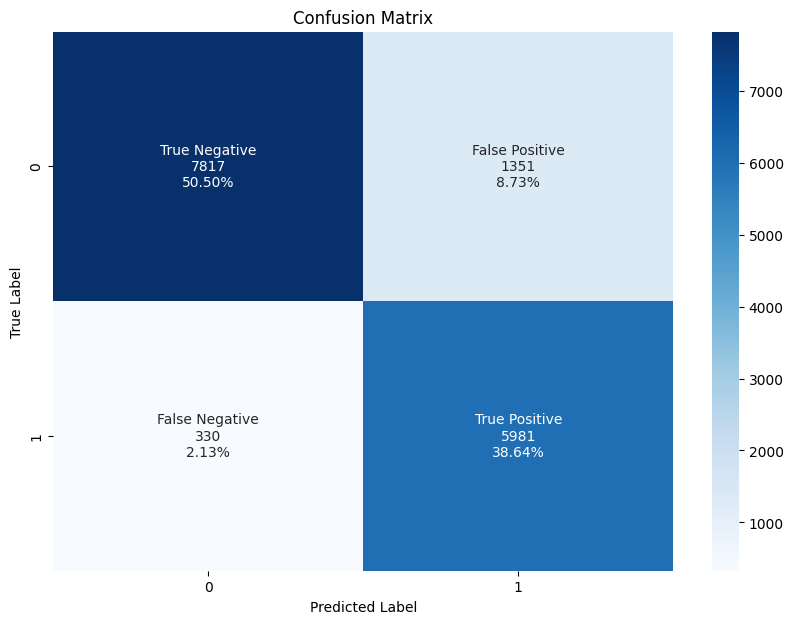

In [152]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
group_names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
group_counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]
group_percentage = ['{0:.2%}'.format(value) for value in cm.flatten() / np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1,v2,v3 in zip(group_names, group_counts, group_percentage)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize=(10,7))
s = sns.heatmap(cm, annot=labels, fmt='',cmap='Blues')
s.set(xlabel ='Predicted Label', ylabel ='True Label', title ='Confusion Matrix')
plt.show()

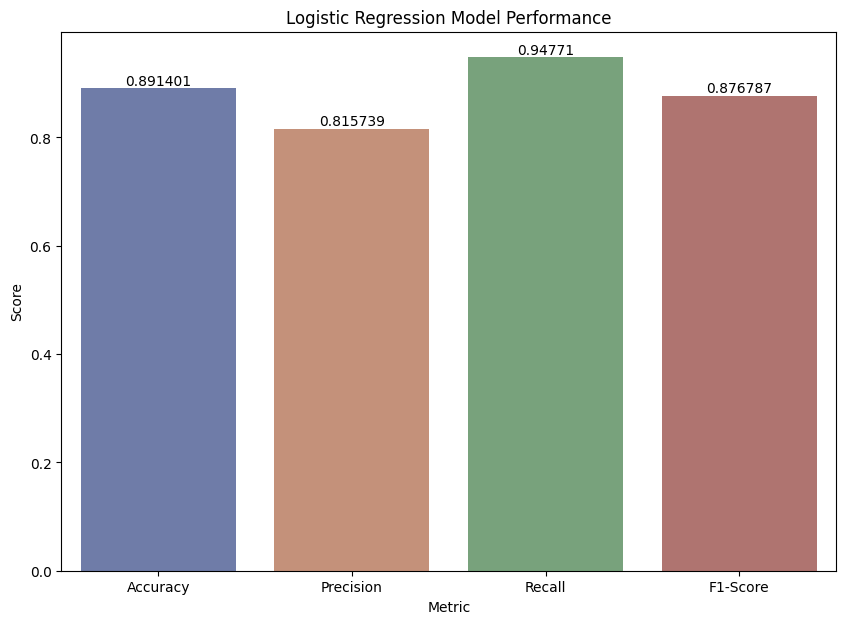

In [153]:
Metric = {'x':['Accuracy', 'Precision', 'Recall', 'F1-Score'] , 'y': [accuracy, precision, recall, f1]}
plt.figure(figsize=(10,7))
plt.xlabel('Metric')
plt.ylabel('Score')
plt.title('Logistic Regression Model Performance')
ax = sns.barplot(x='x',y='y', data = Metric, palette="dark", alpha=.6)
ax.bar_label(ax.containers[0])
plt.show()

## Random Forest Classifier

In [154]:
classifier_rf = RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_jobs=-1,
                                       random_state=42, n_estimators=100, oob_score=True)

classifier_rf.fit(x_train, y_train)

classifier_rf.oob_score_

0.9790357748526205

In [155]:
y_pred = classifier_rf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

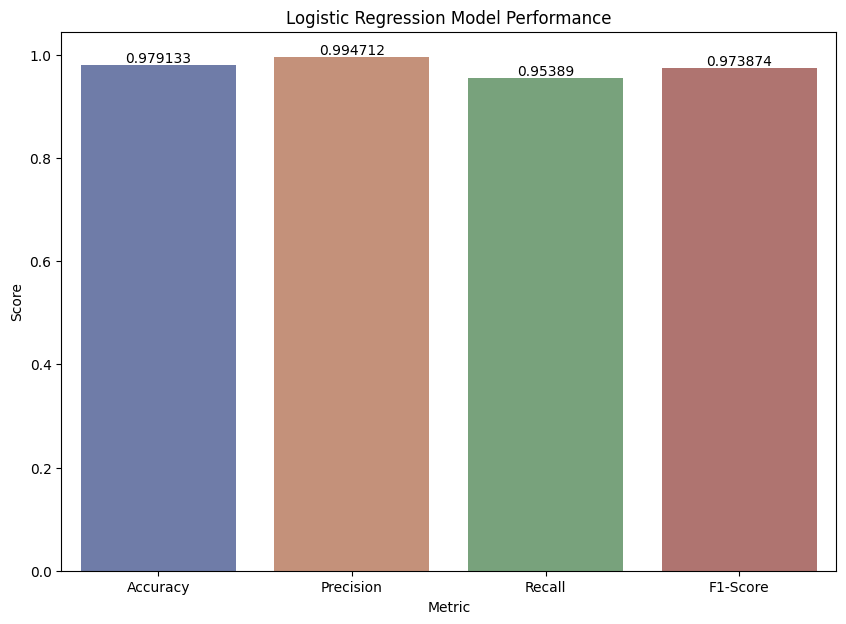

In [156]:
Metric = {'x':['Accuracy', 'Precision', 'Recall', 'F1-Score'] , 'y': [accuracy, precision, recall, f1]}
plt.figure(figsize=(10,7))
plt.xlabel('Metric')
plt.ylabel('Score')
plt.title('Logistic Regression Model Performance')
ax = sns.barplot(x='x',y='y', data = Metric, palette="dark", alpha=.6)
ax.bar_label(ax.containers[0])
plt.show()

## Regression Target Variables

In [157]:
x_train_reg, x_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_reg, test_size = 0.2, random_state=42)

In [158]:
lin_reg = LinearRegression()
lin_reg.fit(x_train_reg, y_train_reg)

LinearRegression()

In [159]:
y_pred_reg = lin_reg.predict(x_test_reg)
y_test_reg.head()

,ROI,EMI,ELA
35231,11588.888889,37548.00,634.69
69596,8640.162638,169332.75,2296.00
84908,3381.885150,120654.60,1530.00
82735,2352.941176,27200.00,404.00
2990,6426.735219,62240.00,-469.00


In [160]:
y_pred_reg

array([[ 10748.06115312,  32894.90938079,   1238.44953967],
       [ 11721.33057345, 173554.65788983,   3608.26110652],
       [  2580.18541627, 136302.1957051 ,   1857.65765598],
       ...,
       [  3816.12559244,  -7788.52734793,    442.57790683],
       [  8742.87405283, 112849.34582077,   3445.49270633],
       [ 13668.11613071, 186563.04567727,   3981.13612651]])

Mean Squared Error:  544699513.4142368
Root Mean Squared Error:  23338.798456952252
R-squared:  0.5978364841643264


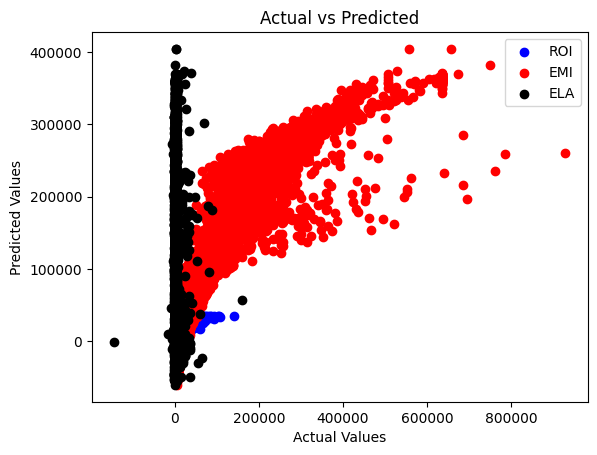

In [161]:
mse = mean_squared_error(y_test_reg, y_pred_reg)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_reg, y_pred_reg)

print("Mean Squared Error: ", mse)
print("Root Mean Squared Error: ", rmse)
print("R-squared: ", r2)

# Plot the actual vs predicted values for both target variables
plt.scatter(y_test_reg['ROI'], y_pred_reg[:,0], color='blue', label='ROI')
plt.scatter(y_test_reg['EMI'], y_pred_reg[:,1], color='red', label='EMI')
plt.scatter(y_test_reg['ELA'], y_pred_reg[:,1], color='black', label='ELA')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

# Forming the Pipeline 

## Classifier_pipline

In [162]:
cls_pipeline = make_pipeline(StandardScaler(), 
                             RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_jobs=-1, random_state=42, n_estimators=100, oob_score=True))

In [163]:
cls_pipeline.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=20, min_samples_leaf=5,
                                        n_jobs=-1, oob_score=True,
                                        random_state=42))])

In [164]:
cls_pred = cls_pipeline.predict(x_test)

In [165]:
r2_score(y_test, cls_pred)

0.9127856967653641

## Ridge_Regresssion

In [166]:
pipeline_reg = make_pipeline(StandardScaler(),
                           Ridge(0.01))

In [167]:
pipeline_reg.fit(x_train_reg, y_train_reg)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('ridge', Ridge(alpha=0.01))])

In [168]:
reg_pred = pipeline_reg.predict(x_test_reg)
train_reg_pred = pipeline_reg.predict(x_test_reg)

# Mean Squared Error

print('MSE test: %.3f' % (mean_squared_error(y_test_reg, reg_pred)))

# R-Squared

print('R^2 test: %.3f' % (r2_score(y_test_reg, reg_pred)))

MSE test: 544699497.358
R^2 test: 0.598


## Saving the model

In [169]:
import pickle

In [170]:
pickle.dump(cls_pipeline, open('models/random_forest_cls.pkl', 'wb'))
pickle.dump(pipeline_reg, open('models/ridge_model.pkl', 'wb'))